# Baseline Output analysis

In [25]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import skew
from plotter import parallel_plots_many_policies
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
import plotter

In [27]:
# Change the font type of matplotlib figures to make it match with the report

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12

Read the results of the optimization:

In [30]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns="Unnamed: 0")
opt_results

v0        v1        v2        v3        v4        v5        v6  \
0    0.730834  0.450182  0.424404  0.319819  0.650677  0.975016 -0.656900   
1    0.005141  0.548707  0.862325  0.207033  0.590201  0.215243 -0.605501   
2    0.007177  0.539073  0.221184  0.320260  0.643743  0.985250 -0.521069   
3    0.034147  0.434242  0.147631  0.320184 -0.286204  0.215199 -0.670085   
4    0.010074  0.514504  0.221184  0.320184  0.637432  0.989385 -0.642458   
..        ...       ...       ...       ...       ...       ...       ...   
743  0.071970  0.438354  0.233293  0.321424  0.686571  0.988964  0.609197   
744  0.004337  0.438417  0.195105  0.320144  0.643479  0.885206 -0.524347   
745  0.005908  0.475851  0.196941  0.320184  0.644539  0.991678 -0.516308   
746  0.004663  0.477542  0.172681  0.320184  0.213833  0.978230  0.322651   
747  0.007140  0.531009  0.142144  0.320856  0.644180  0.214032 -0.640707   

           v7        v8        v9  ...      v158      v159      v160  \
0    0.930824 -0.451667  0.142914  ... -0.716342  0.201346  0.446620   
1    0.937064 -0.688742  0.390398  ...  0.708807  0.037131  0.451054   
2    0.595720  0.649823  0.138076  ... -0.825481  0.989223  0.461158   
3    0.596556 -0.900924  0.219982  ... -0.688387  0.153388  0.437515   
4    0.150346 -0.217508  0.140871  ... -0.688913  0.906764  0.451179   
..        ...       ...       ...  ...       ...       ...       ...   
743  0.631377  0.659369  0.140894  ... -0.518081  0.208785  0.702111   
744  0.595603  0.676922  0.141615  ...  0.708996  0.194346  0.444082   
745  0.914871  0.799110  0.145083  ... -0.585824  0.191407  0.460074   
746  0.907055  0.779592  0.139074  ... -0.518937  0.184923  0.439063   
747  0.732926 -0.878519  0.194829  ... -0.697664  0.972294  0.433192   

         v161      v162      v163  egypt_irr  egypt_low_had  sudan_irr  \
0    0.051020  0.257054  0.773798   5.746610       0.037500   0.130904   
1    0.574183  0.236305  0.815490   7.340291       0.008333   0.001585   
2    0.694305  0.008392  0.297532   3.869901       0.570833   1.128971   
3    0.100202  0.272804  0.108059   6.722692       0.212500   0.073509   
4    0.510280  0.021606  0.179781   7.742899       0.045833   0.083464   
..        ...       ...       ...        ...            ...        ...   
743  0.711662  0.185108  0.819613   6.228915       0.029167   0.002636   
744  0.449454  0.255549  0.120743   6.651959       0.129167   0.224474   
745  0.347628  0.209203  0.309886   5.877299       0.050000   0.597057   
746  0.287017  0.204944  0.822115   6.611234       0.066667   0.156603   
747  0.724881  0.023505  0.114944   5.379651       0.329167   0.357189   

     ethiopia_hydro  
0          9.424462  
1         14.757911  
2         11.577264  
3         14.966181  
4         14.902503  
..              ...  
743       11.633302  
744       15.029857  
745       13.753664  
746       14.229568  
747       15.044420  

[748 rows x 168 columns]

In [31]:
policies, objectives = opt_results.iloc[:, :-4], opt_results.iloc[:, -4:]

In [32]:
objectives.describe()

egypt_irr  egypt_low_had   sudan_irr  ethiopia_hydro
count  748.000000     748.000000  748.000000      748.000000
mean     5.711725       0.162004    0.753540       13.279431
std      1.408487       0.185139    0.859686        1.469356
min      2.916307       0.000000    0.000000        9.424000
25%      4.668361       0.033333    0.130904       12.106538
50%      5.666887       0.095833    0.402536       13.554655
75%      6.564311       0.216667    1.112521       14.741105
max     12.633985       0.837500    3.443679       15.084710

In [33]:
best_obj_indices = dict()
directions = ["min", "min", "min", "max"]

for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(), :].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(), :].index
    else:
        print("issue with directions!")

    best_obj_indices[obj] = indexes

In [34]:
best_obj_indices

{'egypt_irr': Int64Index([190], dtype='int64'),
 'egypt_low_had': Int64Index([192, 231, 290, 318, 357, 359, 362, 368, 455, 534, 536, 546, 567,
             589, 716, 740],
            dtype='int64'),
 'sudan_irr': Int64Index([ 84,  92,  93, 279, 300, 302, 333, 387, 417, 438, 499, 542, 553,
             582, 584, 587, 638, 639, 685, 695, 702, 741],
            dtype='int64'),
 'ethiopia_hydro': Int64Index([452], dtype='int64')}

In [35]:
best_egypt_irr = policies.loc[190]
best_egypt_low_had = policies.loc[192]
best_sudan_irr = policies.loc[84]
best_ethiopia = policies.loc[452]

Before redoing the simulation with found policies, let's do some objectives visualization:

## Parallel Coordinates Plot

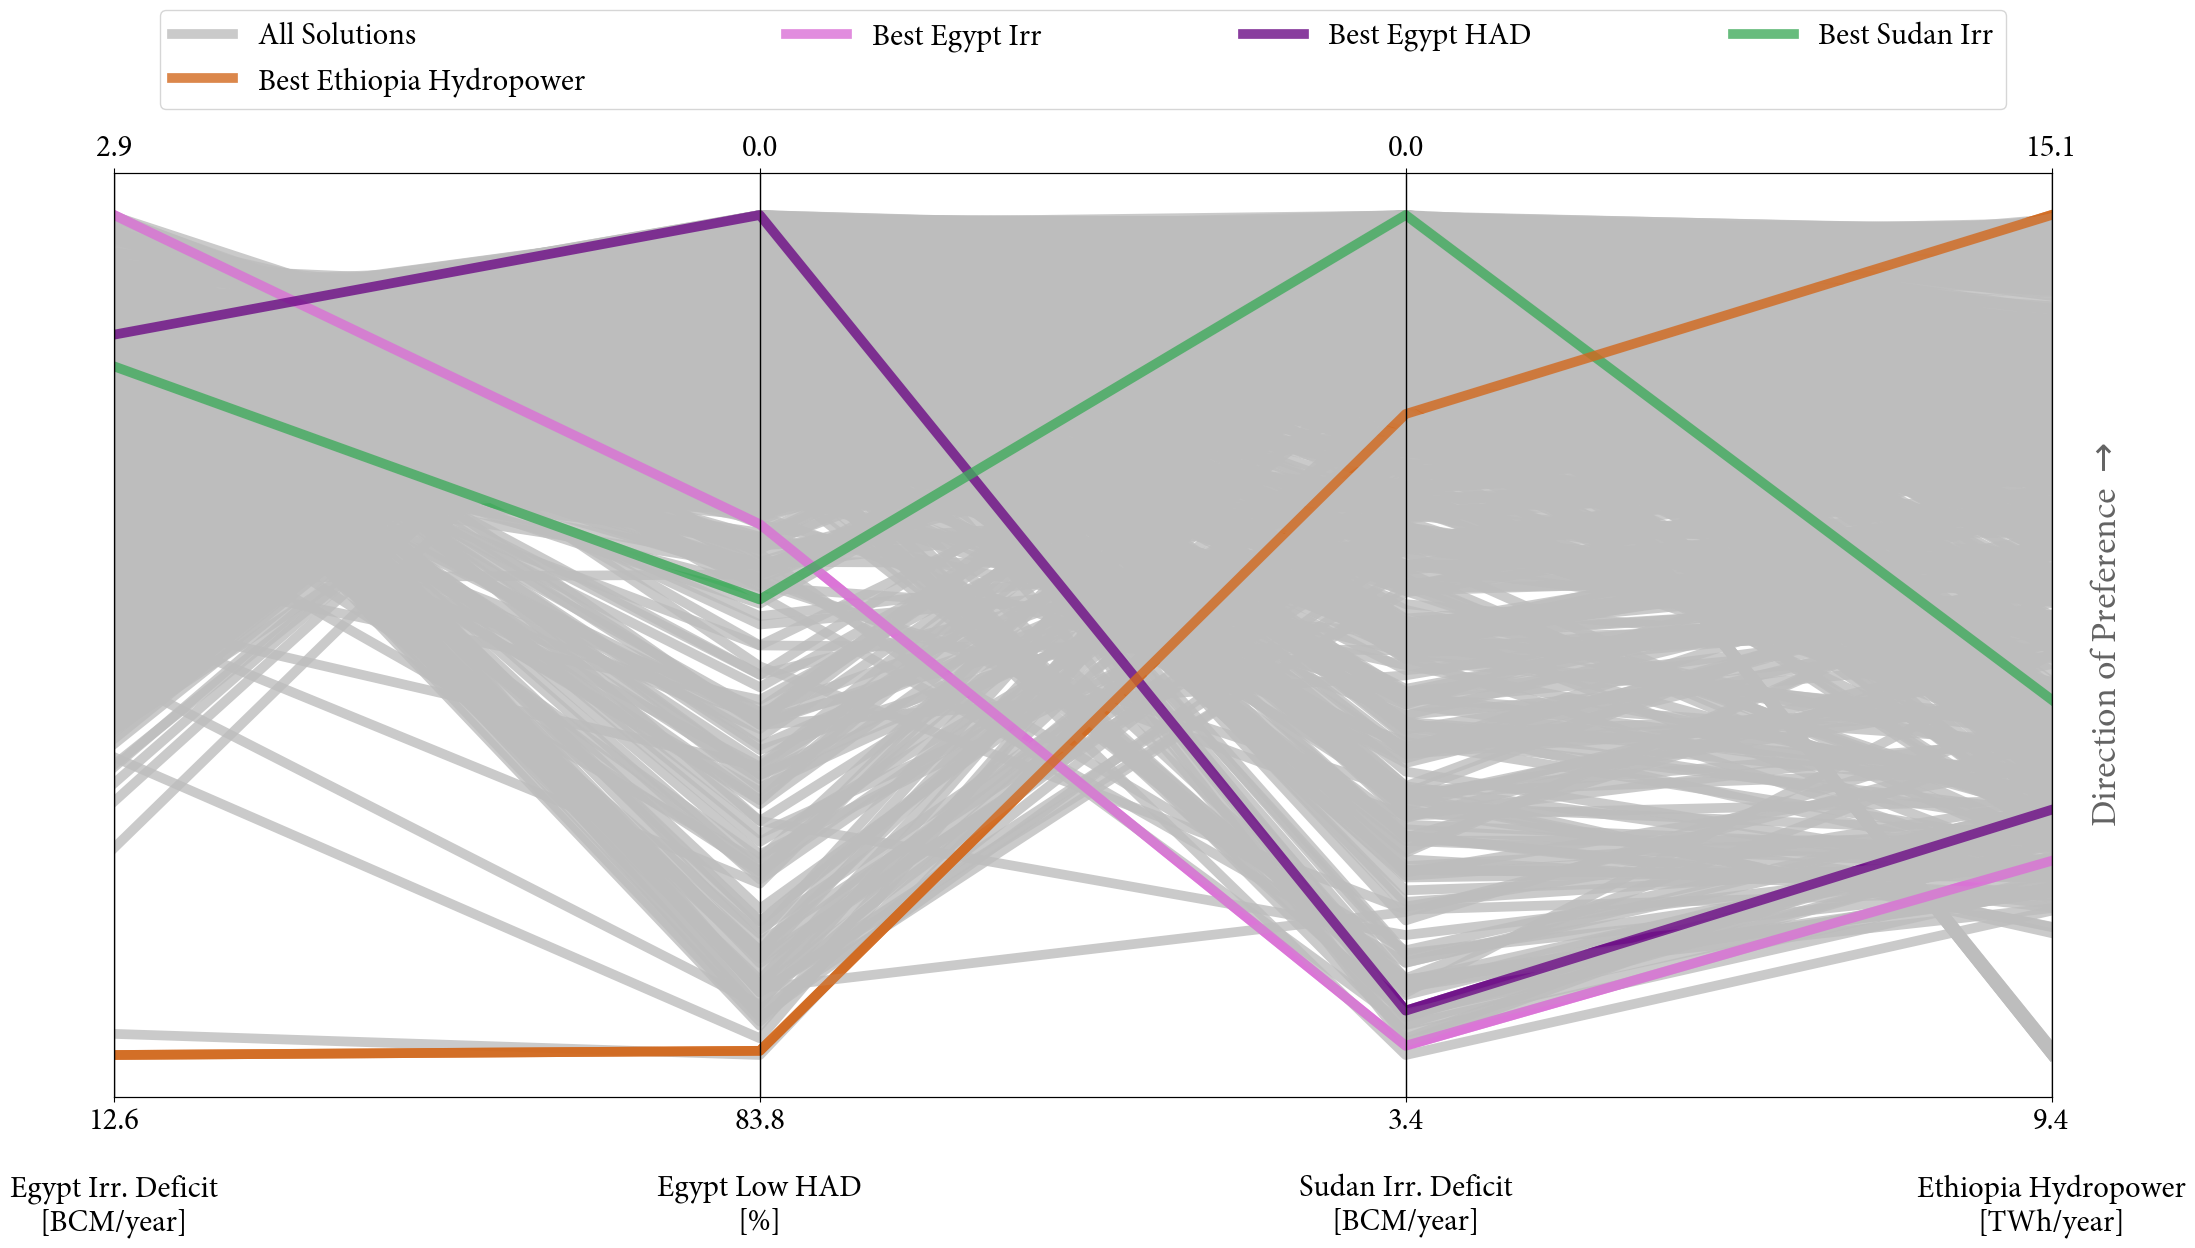

In [36]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    objectives,
    solution_indices=[190, 192, 84, 452],
    solution_names=[
        "Best Egypt Irr",
        "Best Egypt HAD",
        "Best Sudan Irr",
        "Best Ethiopia Hydropower",
    ],
)
plt.show()

## Adding Compromise Solutions

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0. On top of the normalised objectives dataframe, we can find some compromise solutions and include them into the color-coded policy set.

In [37]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min":
            best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max":
            best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)

    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0. On top of the normalised objectives dataframe, we can find some compromise solutions and include them into the color-coded policy set.

In [38]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "max"]
)

In [39]:
def find_percentile_compromise_solutions(objectives_norm_df, percentile):
    # Given a threshold percentage and normalised objectives data frame,
    # returns the indices which performs above the threshold percentage
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [40]:
def find_threshold_compromise_solutions(objectives_norm_df, threshold):
    # Given a threshold value [0-1] and normalised objectives data frame,
    # returns the indices which performs above the threshold value
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [41]:
find_percentile_compromise_solutions(norm_df, 46)

[331, 645]

In [42]:
find_threshold_compromise_solutions(norm_df, 0.75)

[400]

Now, we can add two more solutions into the policy set for further analysis:

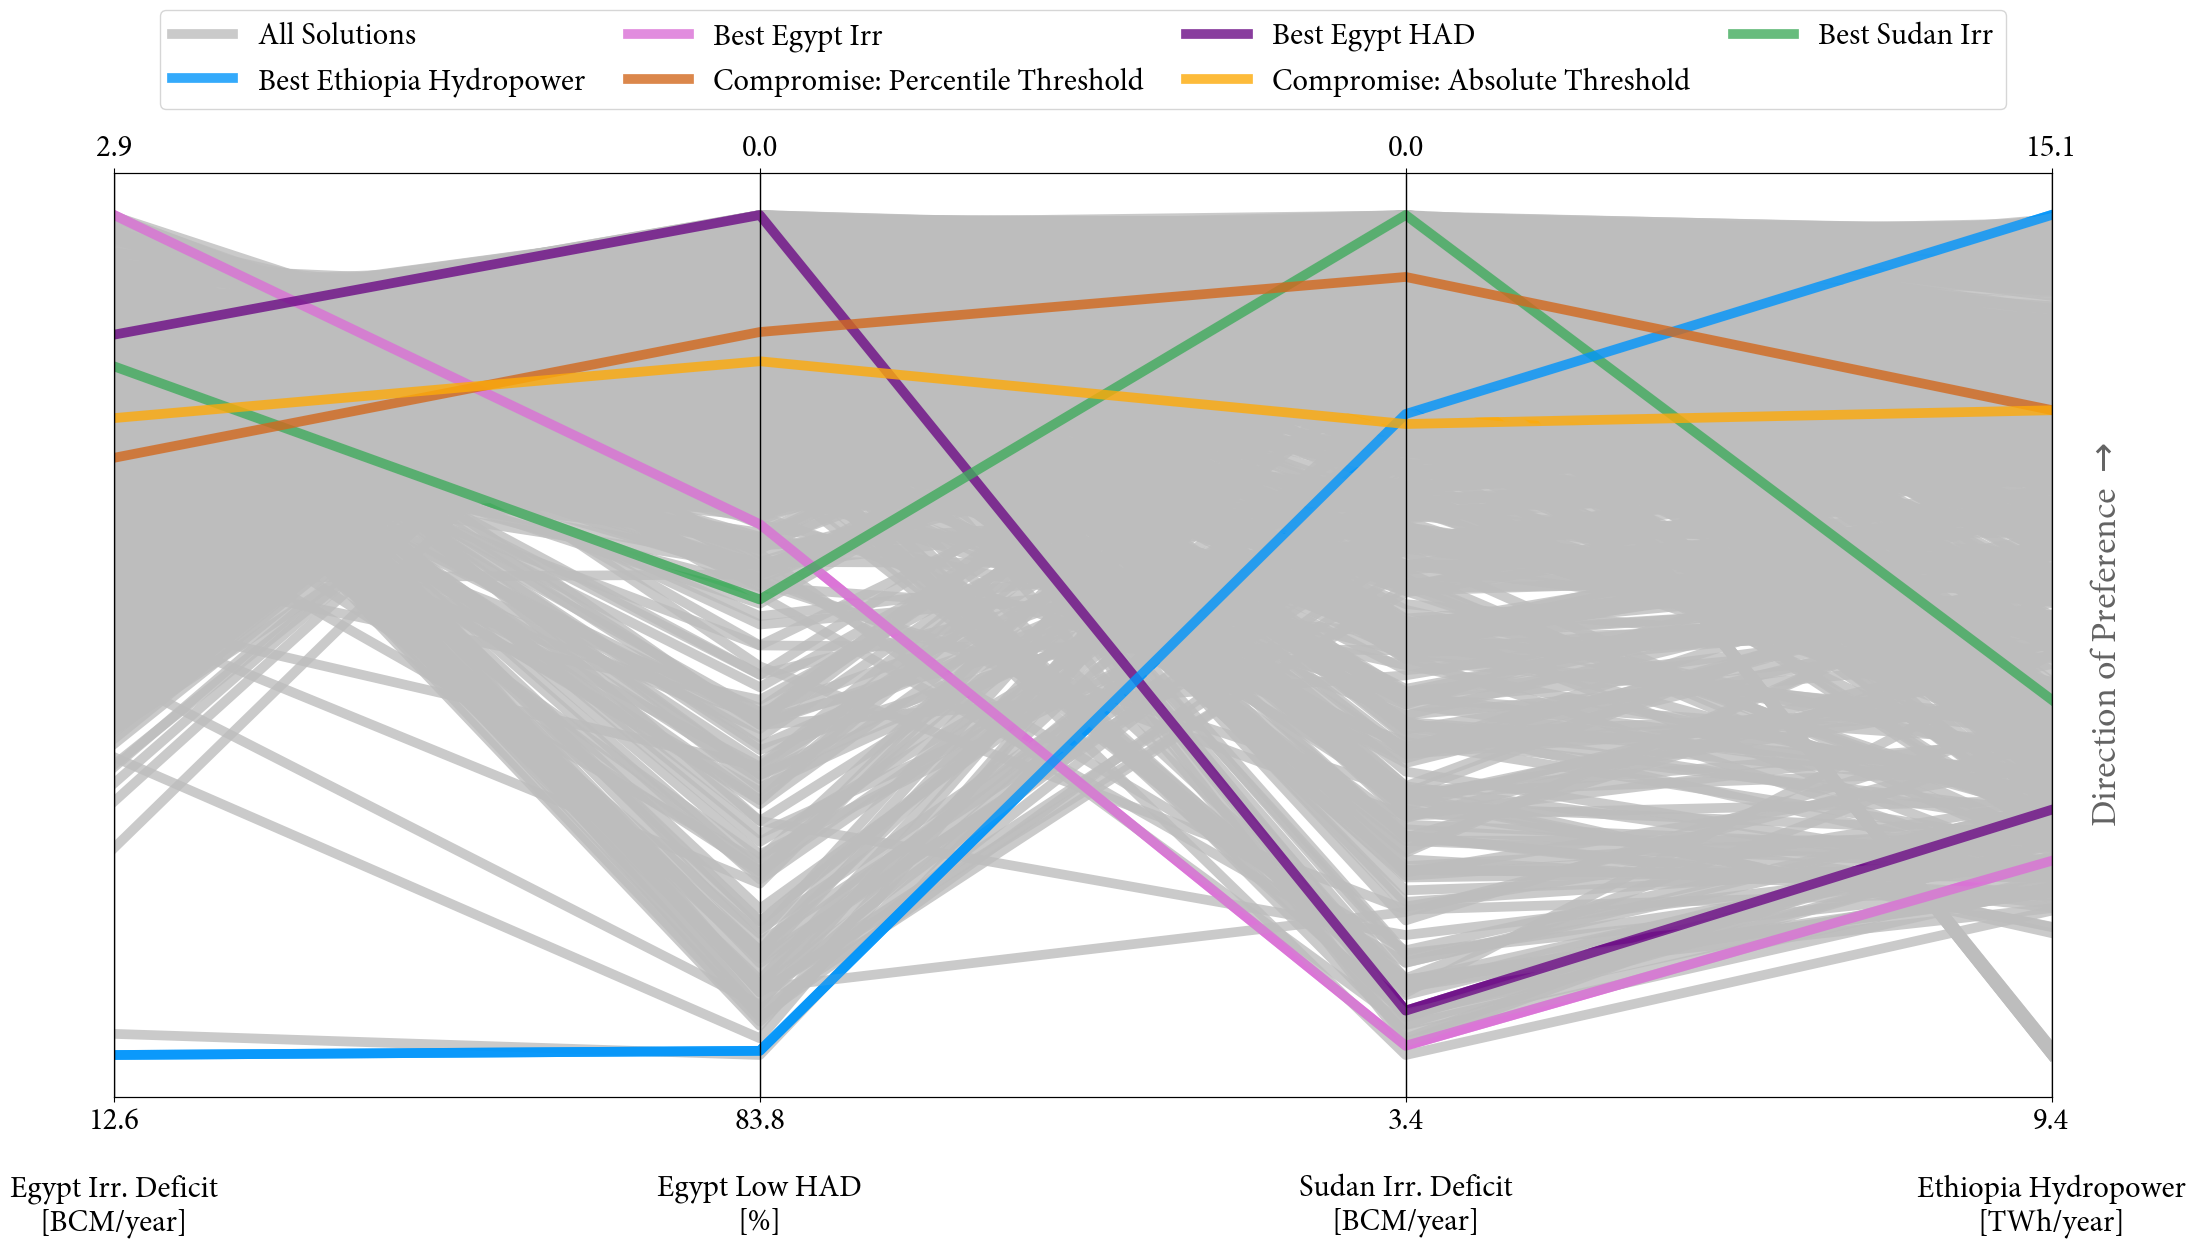

In [44]:
import importlib

importlib.reload(plotter)


solution_indices = [190, 192, 84, 452, 331, 400]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt HAD",
    "Best Sudan Irr",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]

plotter.parallel_plots_many_policies(
    objectives,
    solution_indices=solution_indices,
    solution_names=solution_names,
)

plt.savefig("../plots/baseline_optimization/parallel_plots.svg", bbox_inches="tight")
plt.show()

For the following stage of open exploration/scenario discovery, we save the six exemplary policies from above analysis:

In [45]:
policies_for_exploration = policies.loc[[190, 192, 84, 452, 331, 400], :]
policies_for_exploration["name"] = [
    "best_egypt_aggregate",
    "best_egypt_HAD",
    "best_sudan_aggregate",
    "best_ethiopia",
    "compromise_percentile",
    "compromise_threshold",
]
policies_for_exploration

v0        v1        v2        v3        v4        v5        v6  \
190  0.001812  0.479109  0.436128  0.320184  0.912733  0.985081 -0.521613   
192  0.007186  0.479109  0.436128  0.320184  0.640541  0.985081 -0.590344   
84   0.076517  0.782428  0.221184  0.320218  0.683152  0.985411 -0.518342   
452  0.008617  0.805557  0.422296  0.342201  0.643955  0.955835 -0.557490   
331  0.004663  0.477274  0.226111  0.320184  0.234062  0.978210  0.353271   
400  0.004962  0.436295  0.216880  0.320184  0.686635  0.989388 -0.520028   

           v7        v8        v9  ...      v155      v156      v157  \
190  0.914871 -0.289520  0.138040  ...  0.873763  0.994923  0.848833   
192  0.914871 -0.289520  0.138073  ...  0.873763  0.988488  0.837953   
84   0.595594 -0.293340  0.135399  ...  0.102980  0.571677  0.770315   
452  0.182885 -0.524986  0.158229  ...  0.765557  0.971765  0.072130   
331  0.150197  0.698568  0.139074  ...  0.558574  0.995325  0.837531   
400  0.616010 -0.331961  0.138564  ...  0.772155  0.923646  0.800156   

         v158      v159      v160      v161      v162      v163  \
190 -0.503025  0.916310  0.446678  0.498838  0.206232  0.823093   
192 -0.508952  0.101088  0.446678  0.498838  0.206232  0.823734   
84  -0.689041  0.974277  0.435730  0.283303  0.253831  0.799449   
452  0.046610  0.935345  0.446697  0.167330  0.696817  0.804737   
331 -0.503722  0.988867  0.205440  0.287035  0.204749  0.822115   
400 -0.519991  0.191195  0.446678  0.290767  0.207532  0.821710   

                      name  
190   best_egypt_aggregate  
192         best_egypt_HAD  
84    best_sudan_aggregate  
452          best_ethiopia  
331  compromise_percentile  
400   compromise_threshold  

[6 rows x 165 columns]

In [46]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

## Pair plot of Objective Values

Now, let's show the pairplot of all objectives across the set of solutions found by the optimisation:

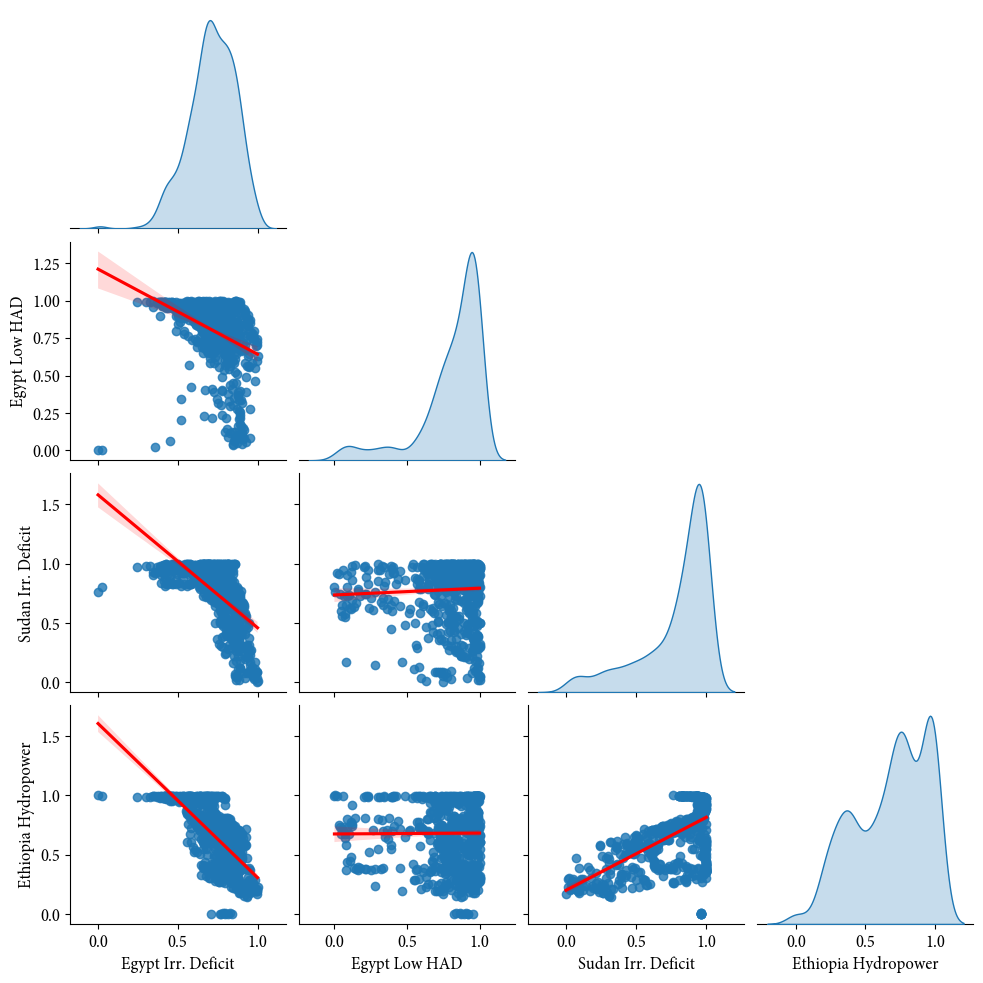

In [47]:
 names_display = [
     "Egypt Irr. Deficit",
     "Egypt Low HAD",
     "Sudan Irr. Deficit",
     "Ethiopia Hydropower",
 ]
 norm_df_names = norm_df.copy()
 norm_df_names.columns = names_display
 sns.pairplot(
     norm_df_names,
     corner=True,
     diag_kind="kde",
     kind="reg",
     plot_kws={"line_kws": {"color": "red"}},
 )
plt.show()

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample normalized DataFrame
# Replace with your actual DataFrame
norm_df = pd.DataFrame({
    'egypt_irr': np.random.rand(10),
    'egypt_low_had': np.random.rand(10),
    'sudan_irr': np.random.rand(10),
    'ethiopia_hydro': np.random.rand(10)
})

objectives = norm_df.columns
slope_matrix = pd.DataFrame(index=objectives, columns=objectives)

# Calculate slopes
for i in range(len(objectives)):
    for j in range(len(objectives)):
        if i != j:
            x = norm_df[objectives[i]].values.reshape(-1, 1)
            y = norm_df[objectives[j]].values
            reg = LinearRegression().fit(x, y)
            slope = reg.coef_[0]
            if abs(slope) > 1:
                slope = 1 / slope
            slope_matrix.iloc[i, j] = slope
        else:
            slope_matrix.iloc[i, j] = 1  # Diagonal elements

# Convert to float
slope_matrix = slope_matrix.astype(float)

# Styling the DataFrame
cell = {
    "selector": "td",
    "props": [("font-family", "Minion Pro"), ("font-size", "11pt"), ("text-align", "center")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-family: Minion Pro; font-size: 10.5pt; background-color: white; text-align: center"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "font-family: Minion Pro; font-size: 10.5pt; background-color: white; text-align: center"
}

styled_df = slope_matrix.style.background_gradient(cmap="coolwarm", axis=None).set_table_styles(
    [cell, index_names, headers]
)

# Display the styled DataFrame
styled_df



In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample normalized DataFrame
# Replace with your actual DataFrame
norm_df = pd.DataFrame({
    'egypt_irr': np.random.rand(10),
    'egypt_low_had': np.random.rand(10),
    'sudan_irr': np.random.rand(10),
    'ethiopia_hydro': np.random.rand(10)
})

# Calculate Pearson correlation matrix
correlation_matrix = norm_df.corr()

# Styling the DataFrame
cell = {
    "selector": "td",
    "props": [("font-family", "Minion Pro"), ("font-size", "11pt"), ("text-align", "center")]
}
index_names = {
    "selector": ".index_name",
    "props": "font-family: Minion Pro; font-size: 10.5pt; background-color: white; text-align: center"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "font-family: Minion Pro; font-size: 10.5pt; background-color: white; text-align: center"
}

styled_corr_df = correlation_matrix.style.background_gradient(cmap="coolwarm", axis=None).set_table_styles(
    [cell, index_names, headers]
)

# Display the styled DataFrame
styled_corr_df


## System Behaviour under Selected Policies

Let's first create and run a separate model under every one of the policies and store them in a dict. Then, bring the plotter class for visuals.

In [51]:
solution_indices = [190, 192, 84, 452, 331, 400]
solutions = [policies.loc[i] for i in solution_indices]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt HAD",
    "Best Sudan Irr",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]
running_models = dict()
for i, sol_name in tqdm(enumerate(solution_names)):
    new_model = ModelNile()
    new_model = generate_input_data(new_model)
    new_model.evaluate(solutions[i])
    running_models[sol_name] = new_model

6it [02:42, 27.05s/it]


----------------
Best Egypt Irr
----------------


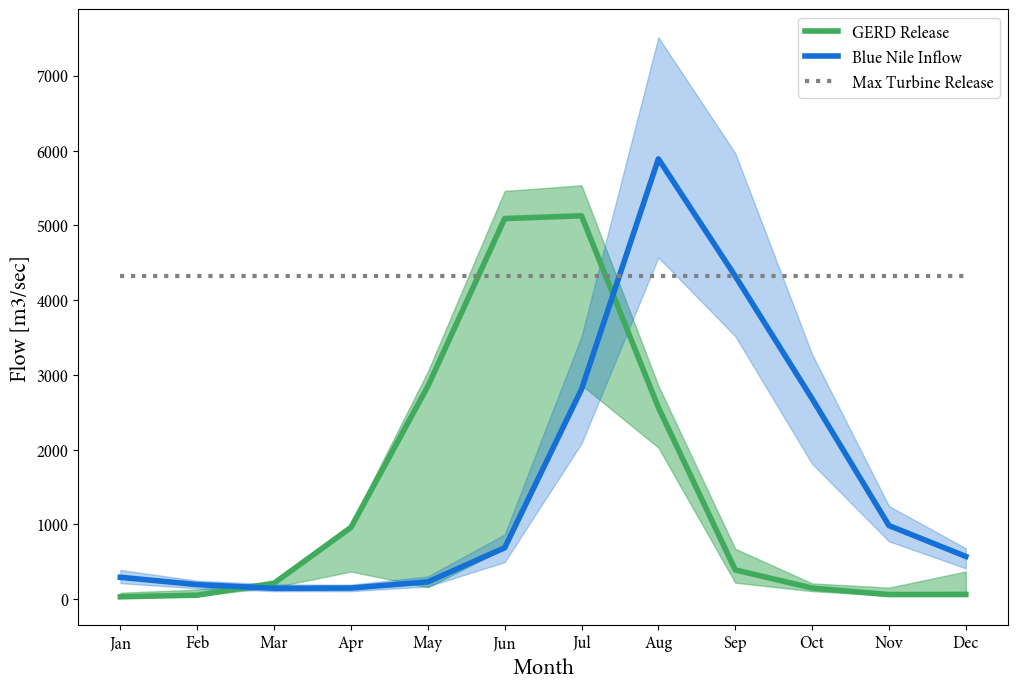

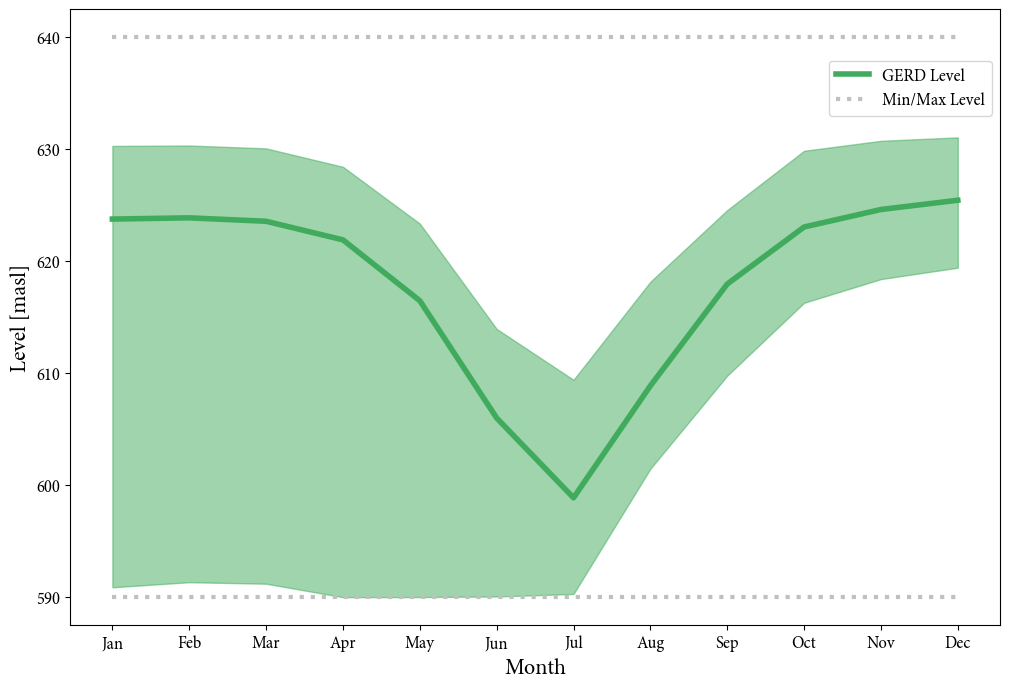

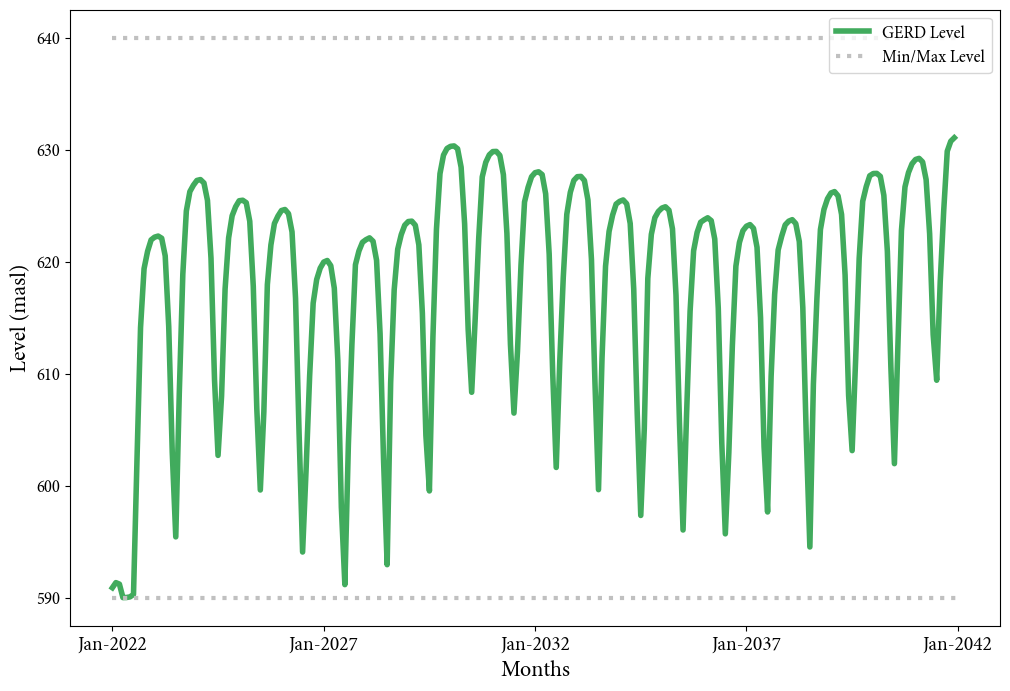

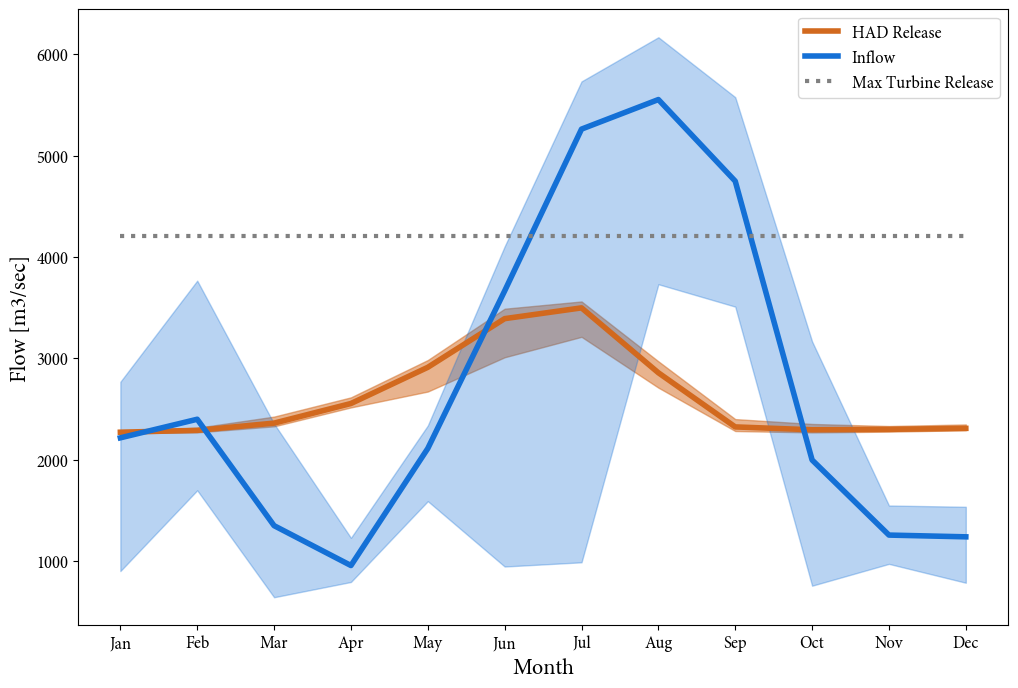

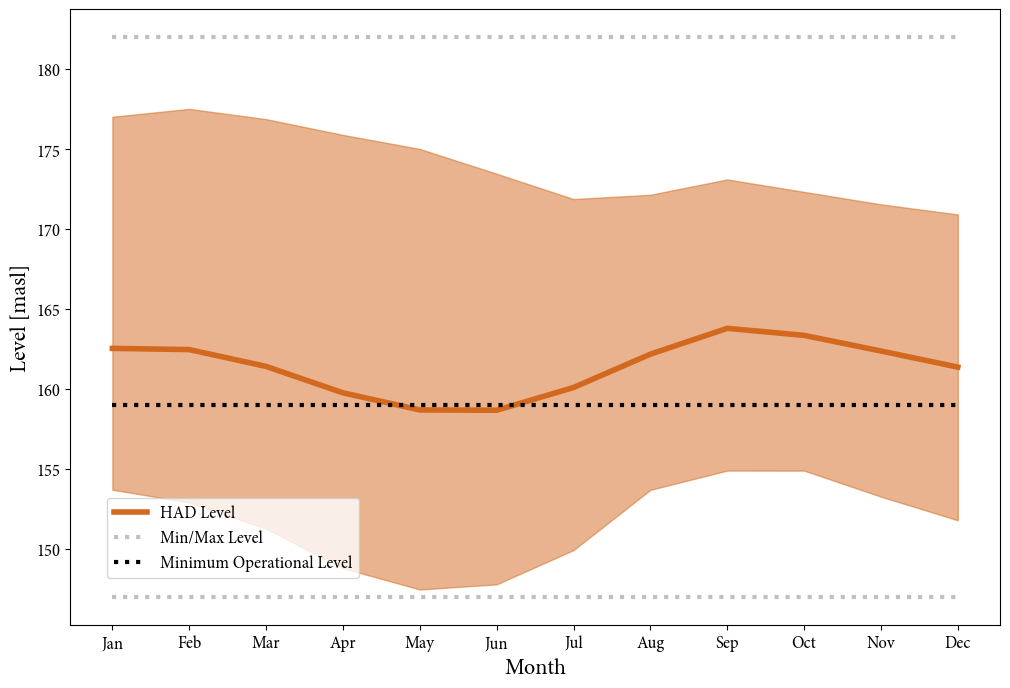

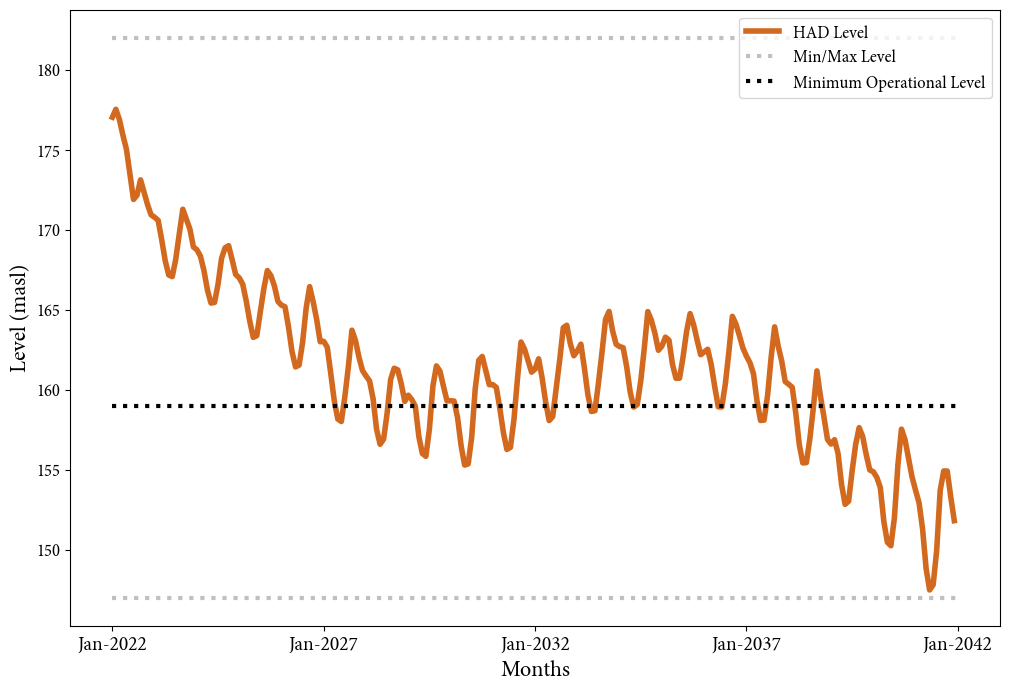

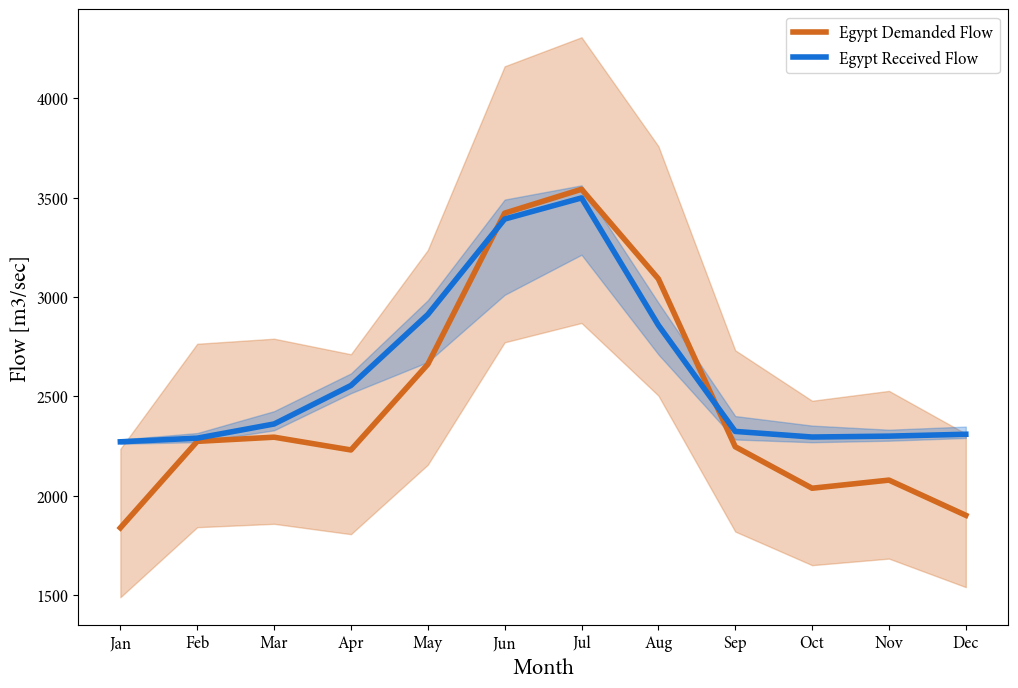

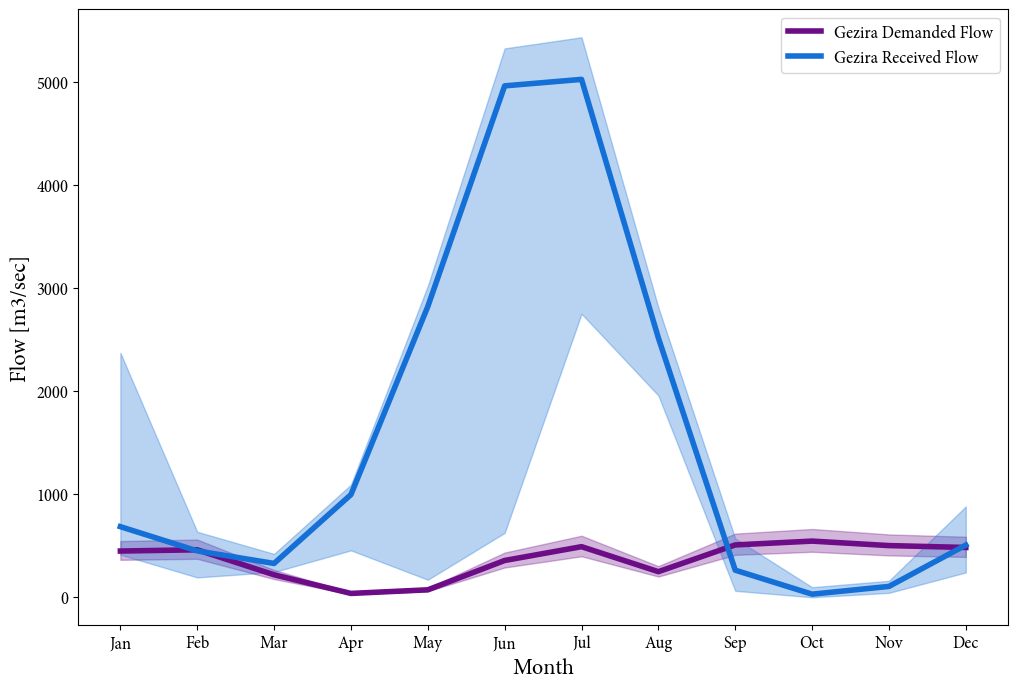

----------------
Best Egypt HAD
----------------


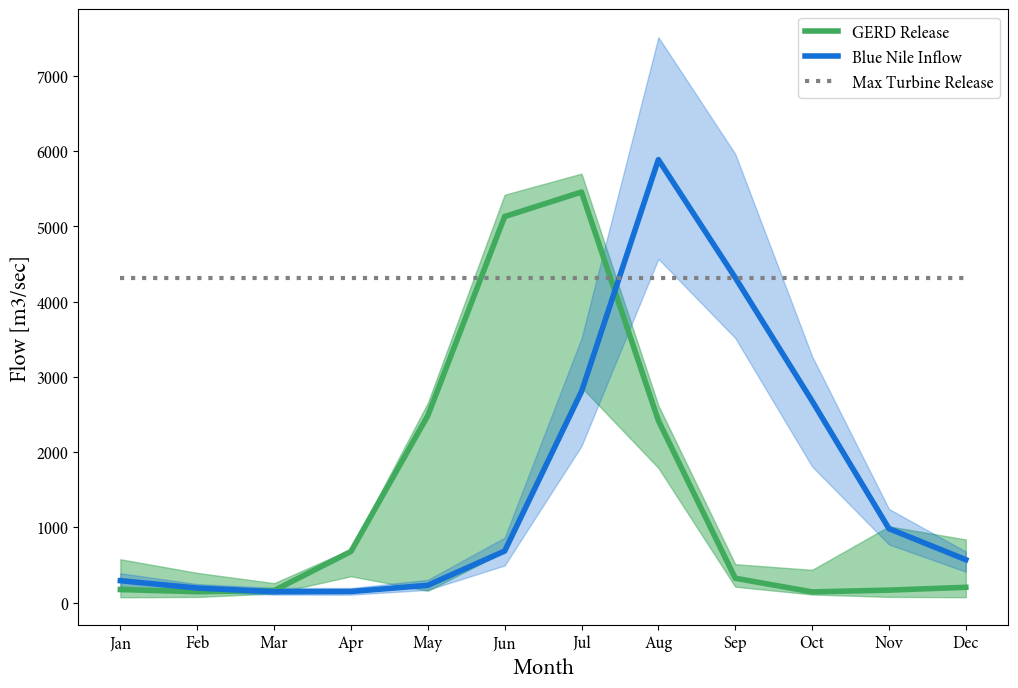

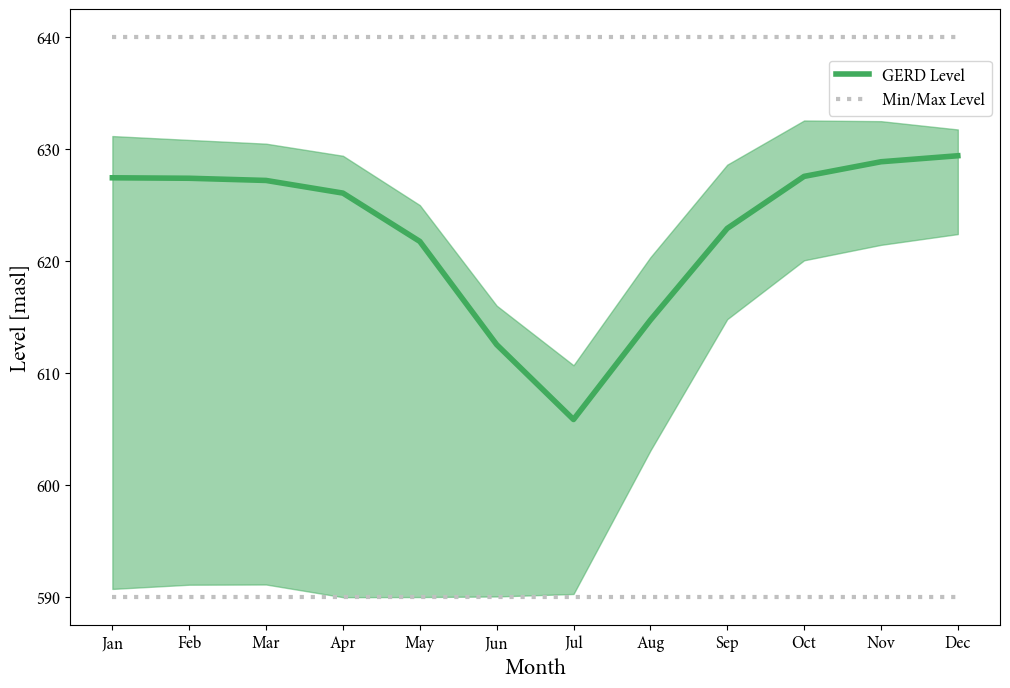

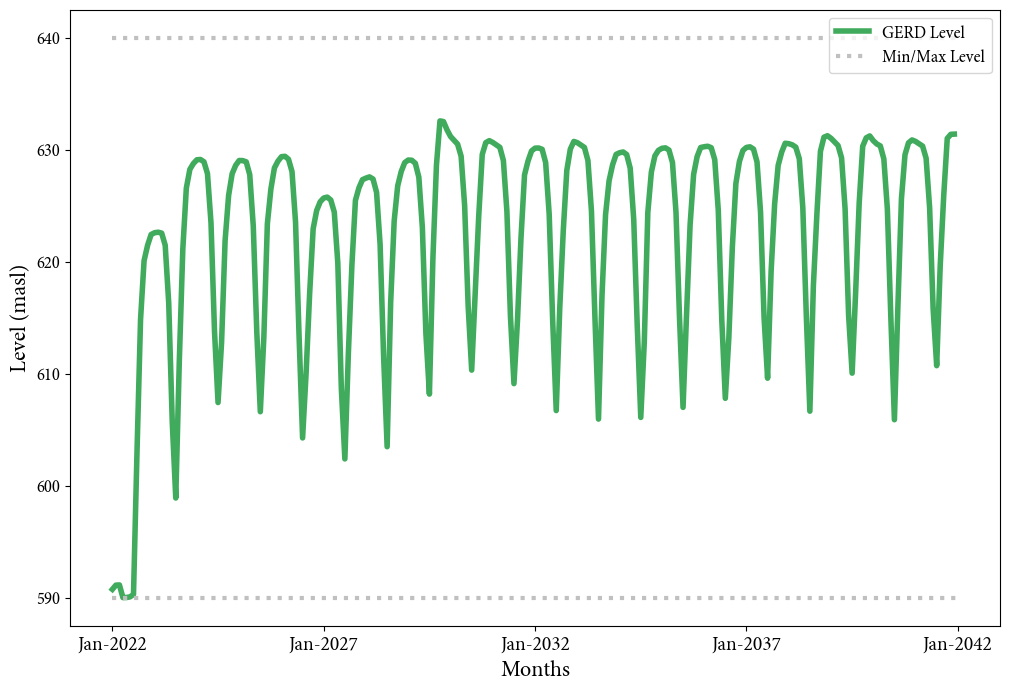

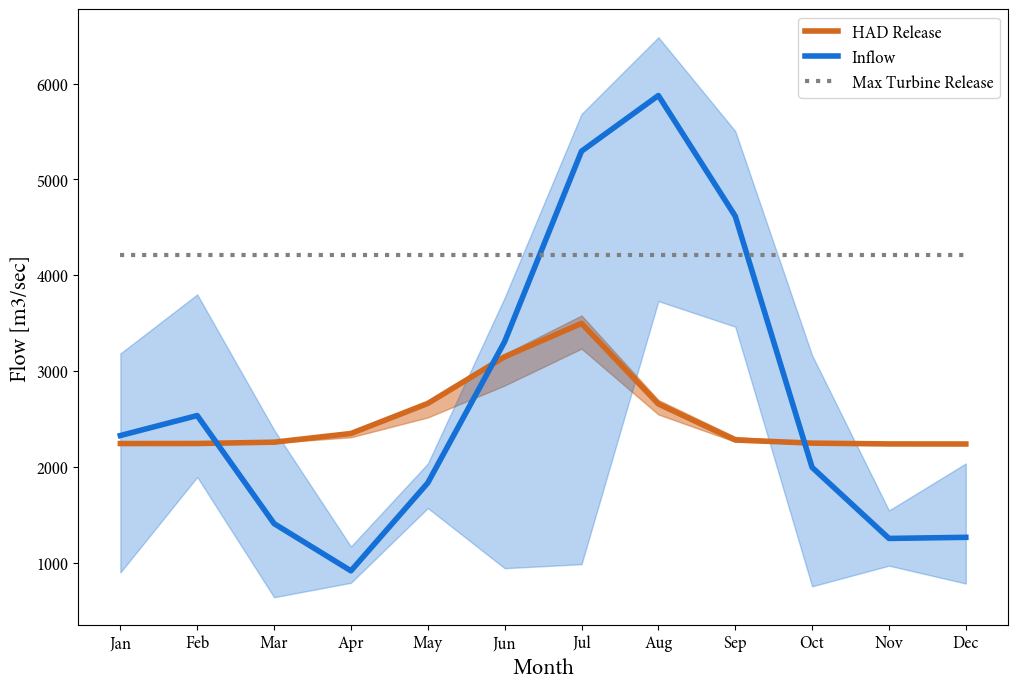

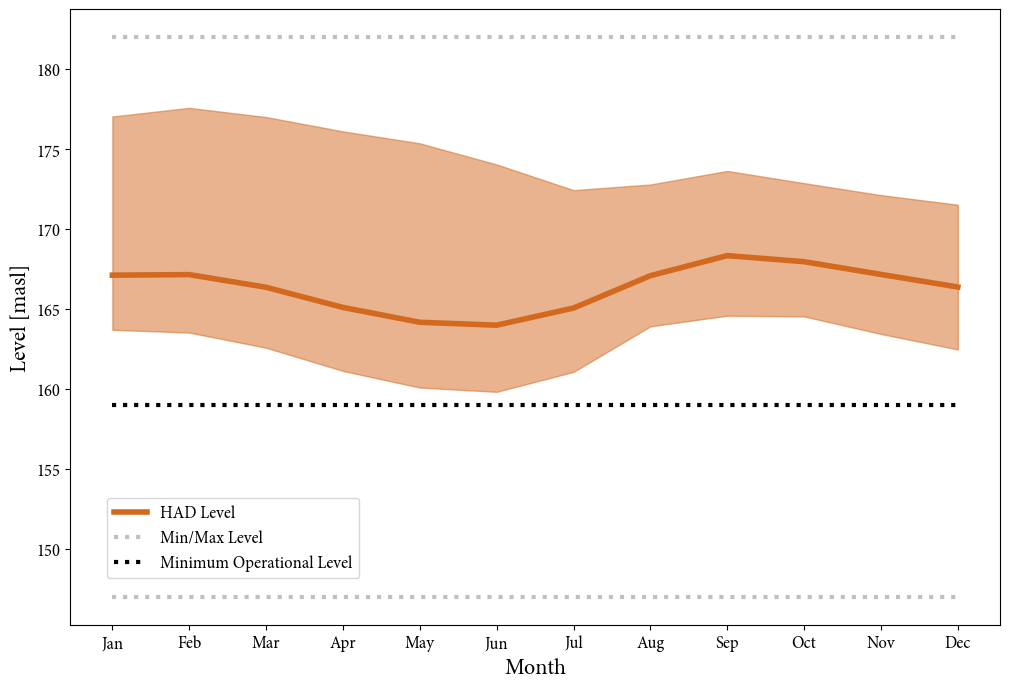

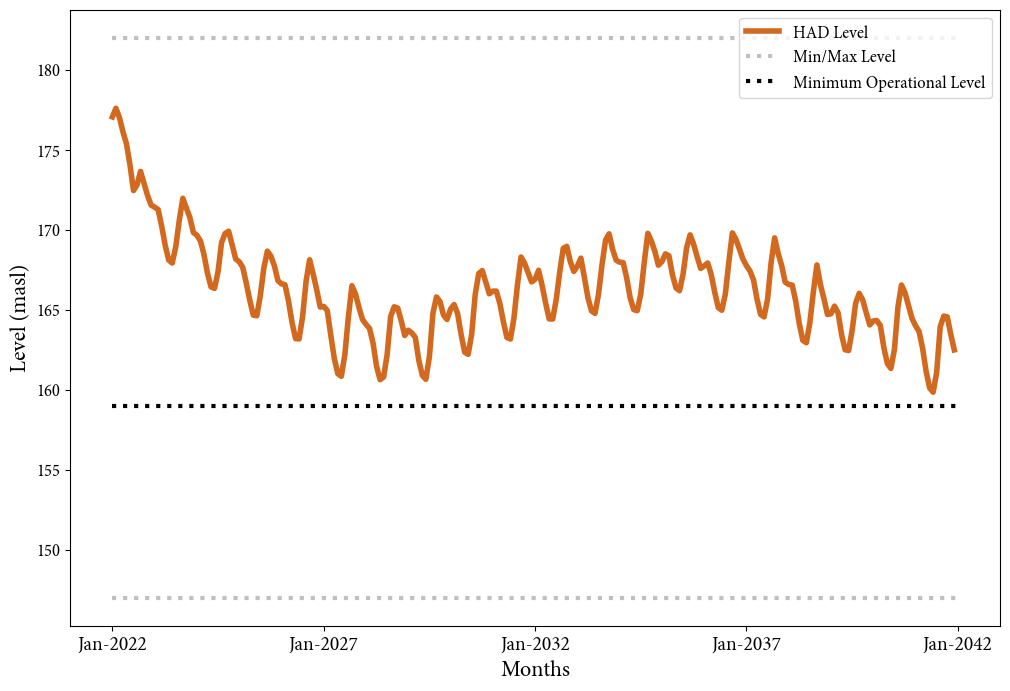

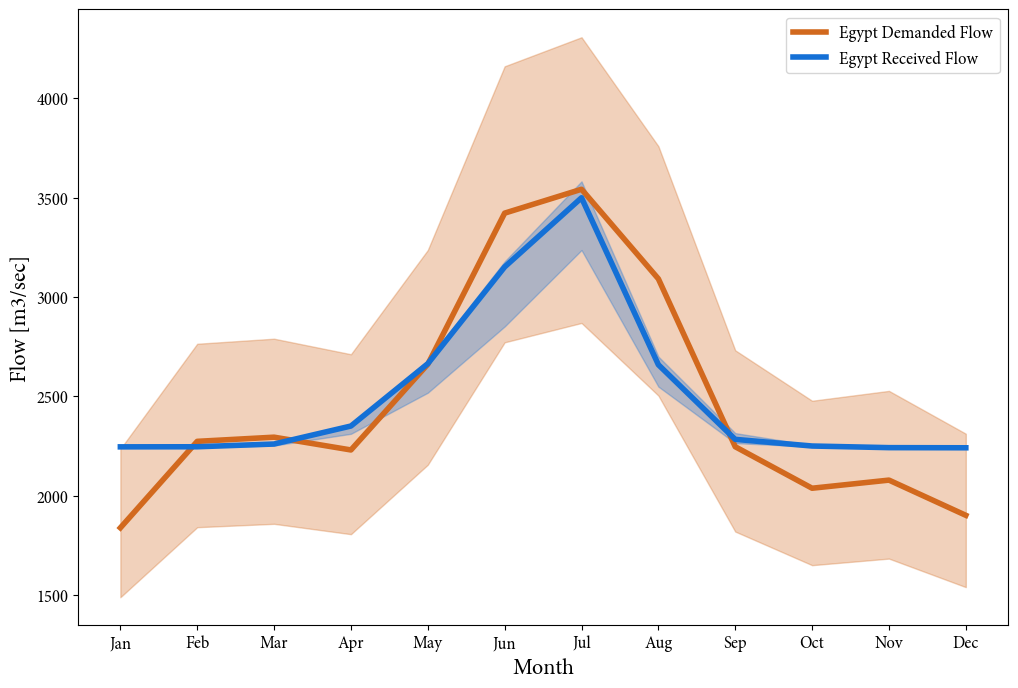

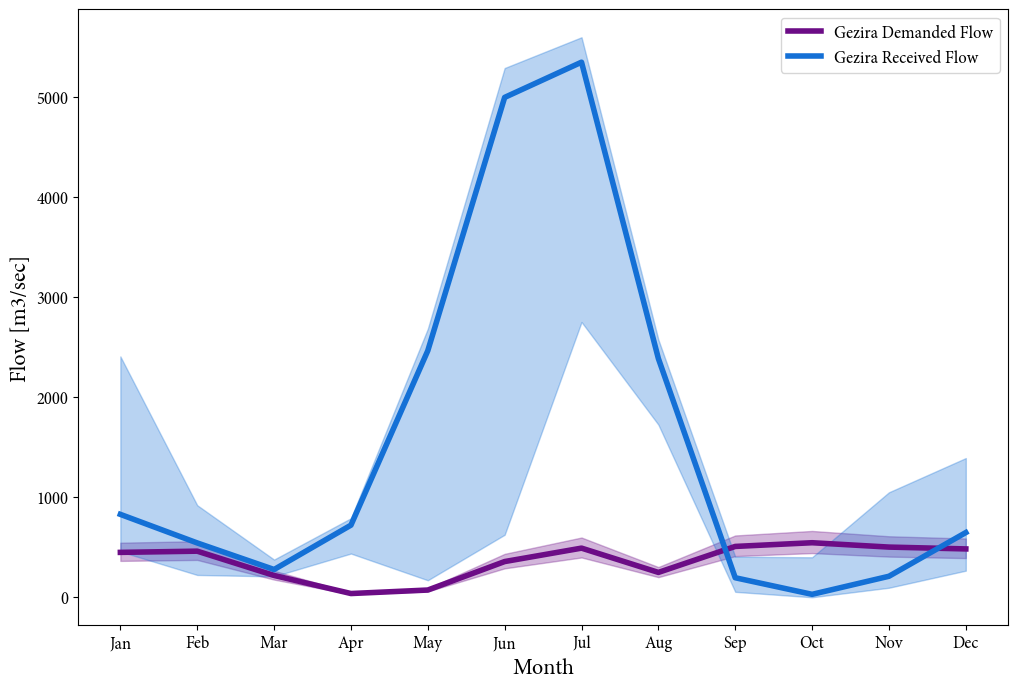

----------------
Best Sudan Irr
----------------


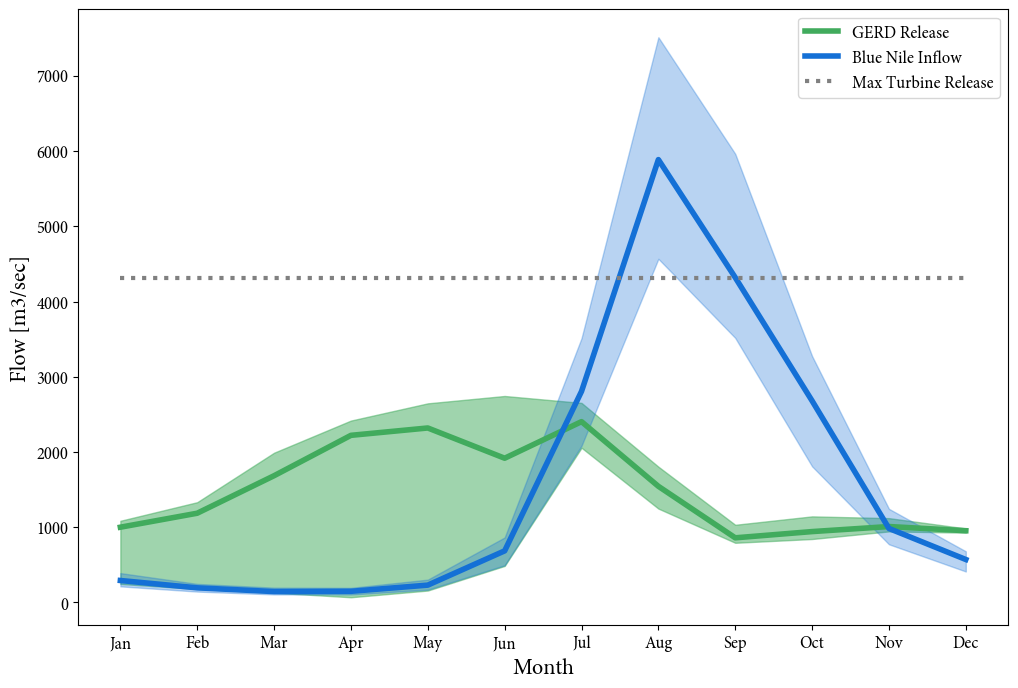

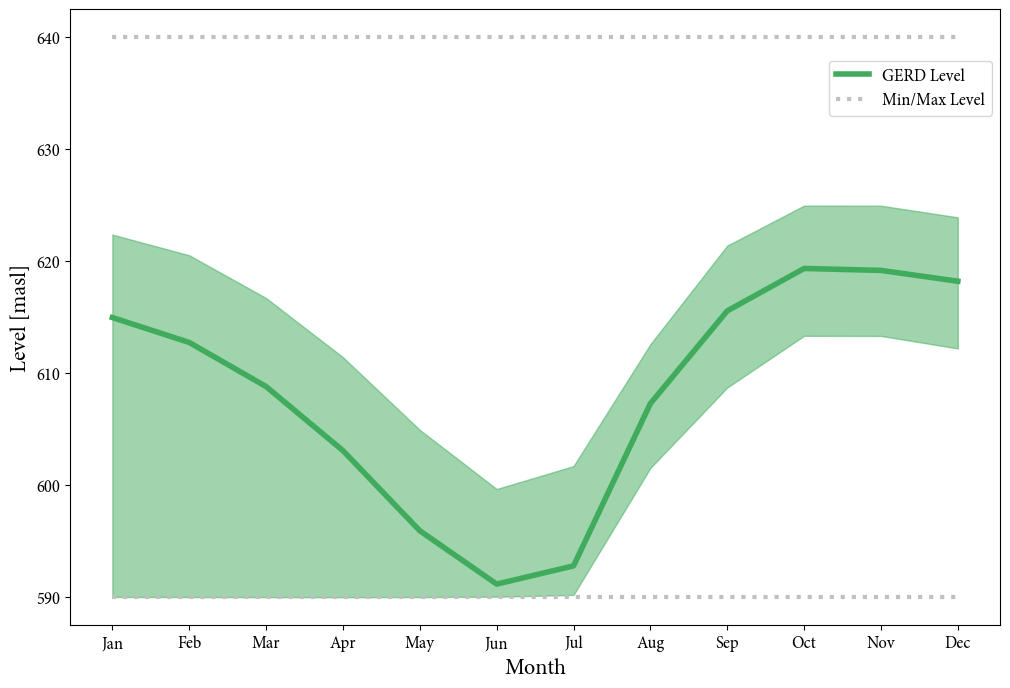

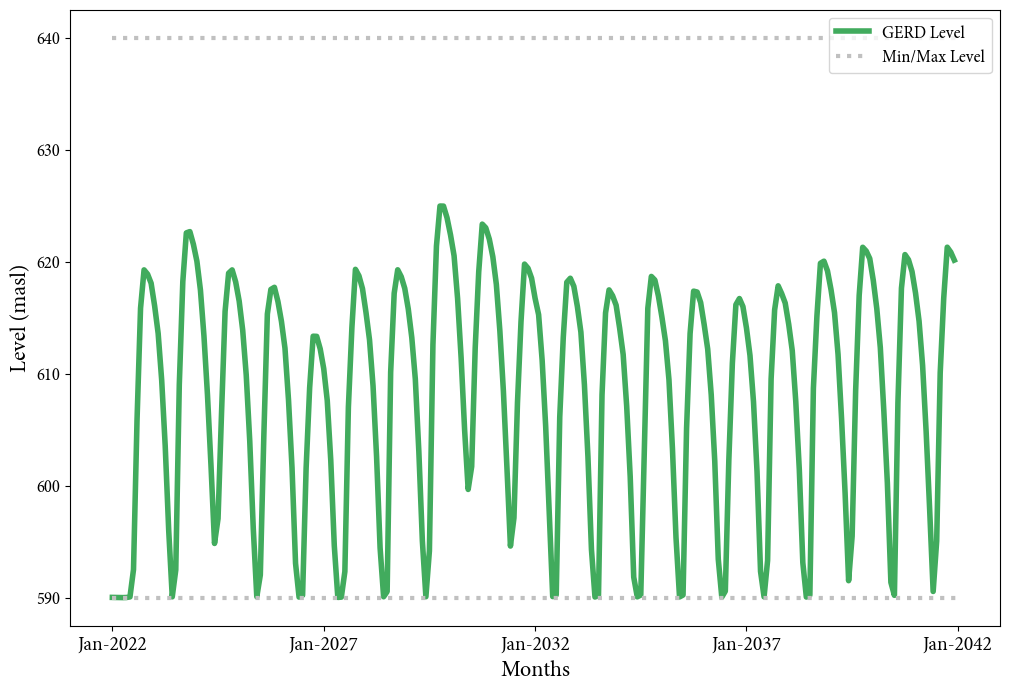

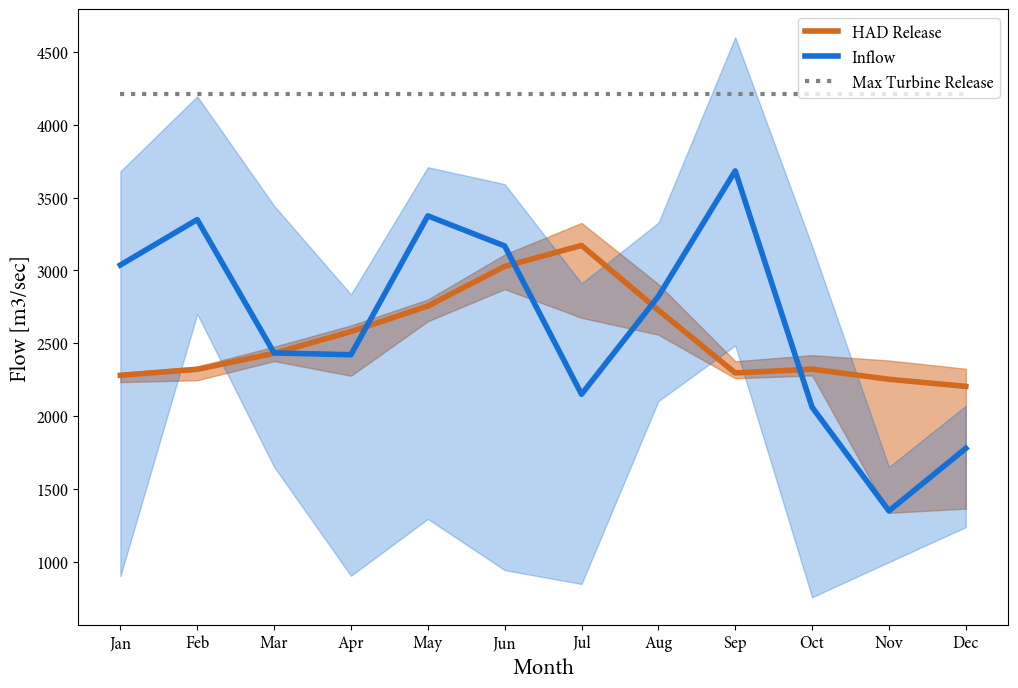

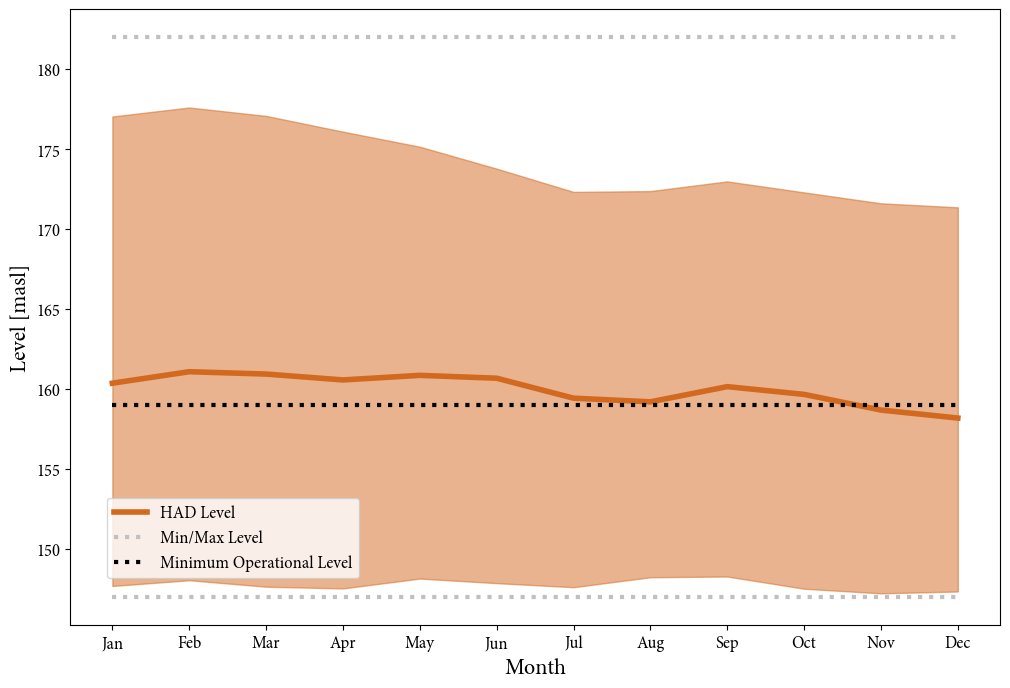

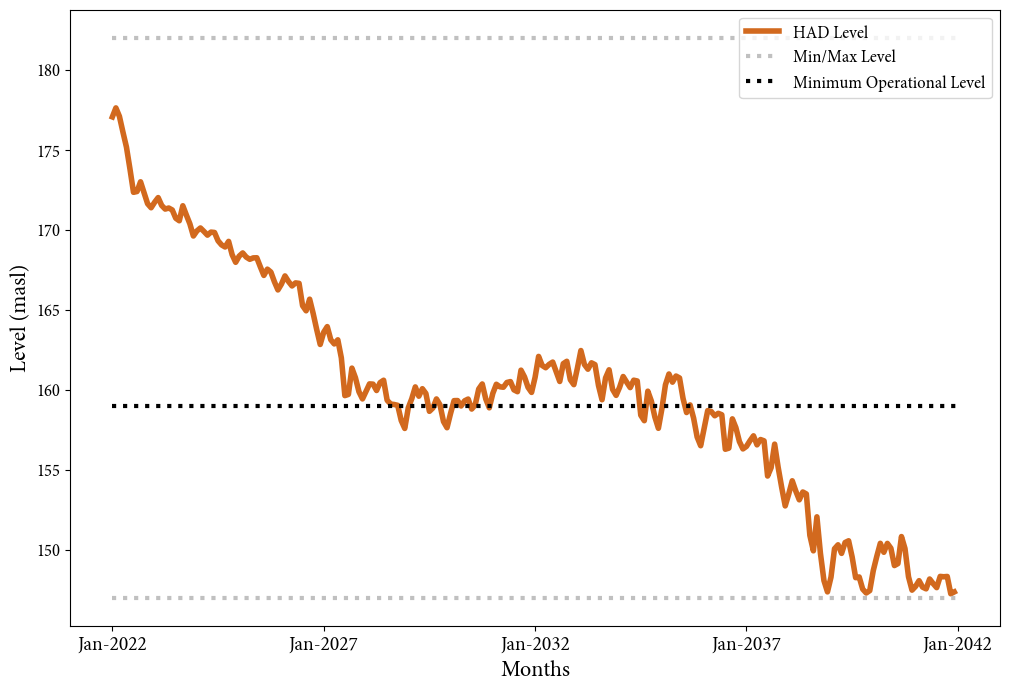

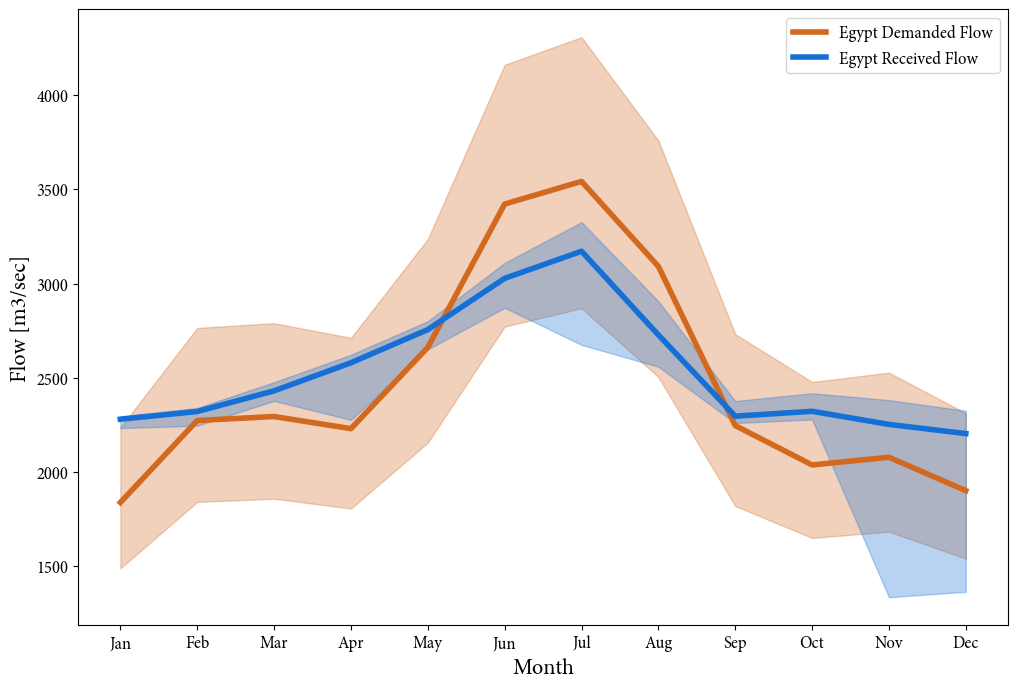

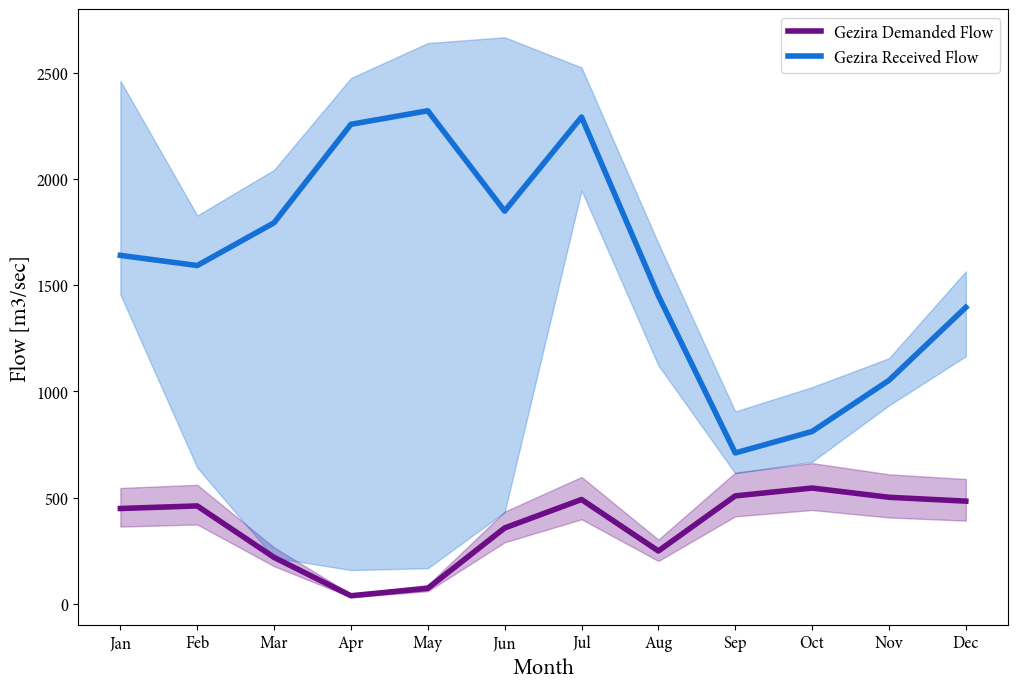

----------------
Best Ethiopia Hydropower
----------------


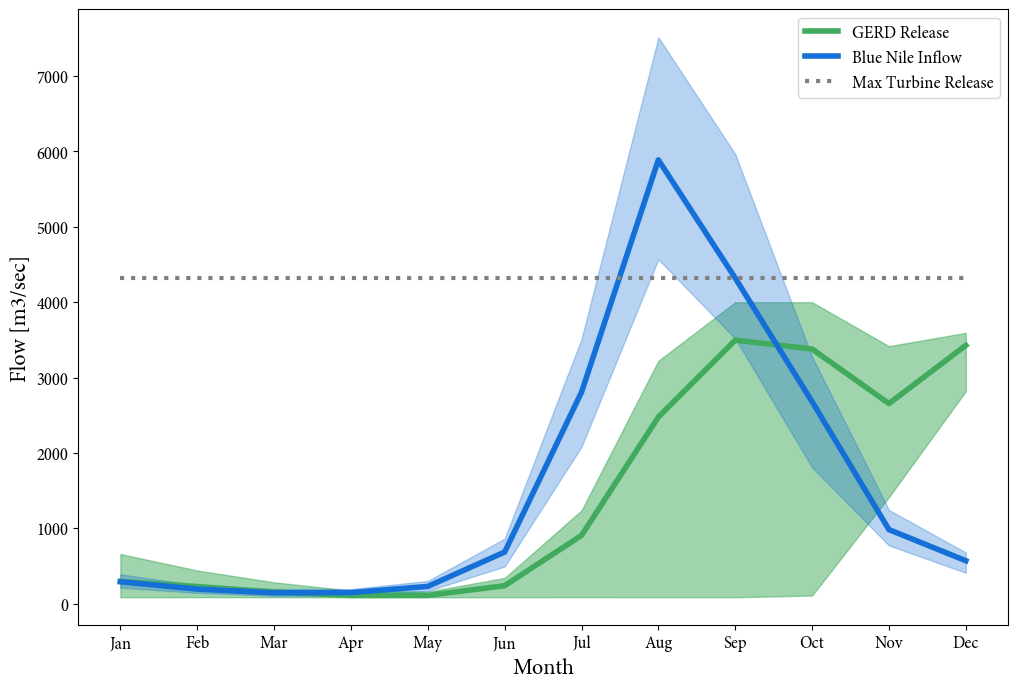

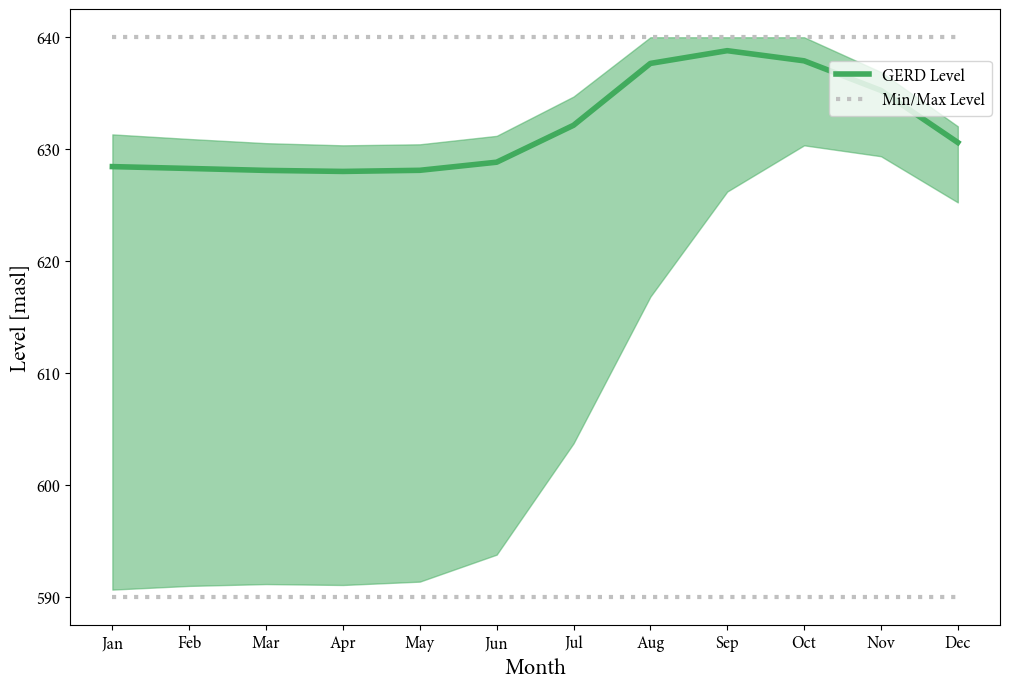

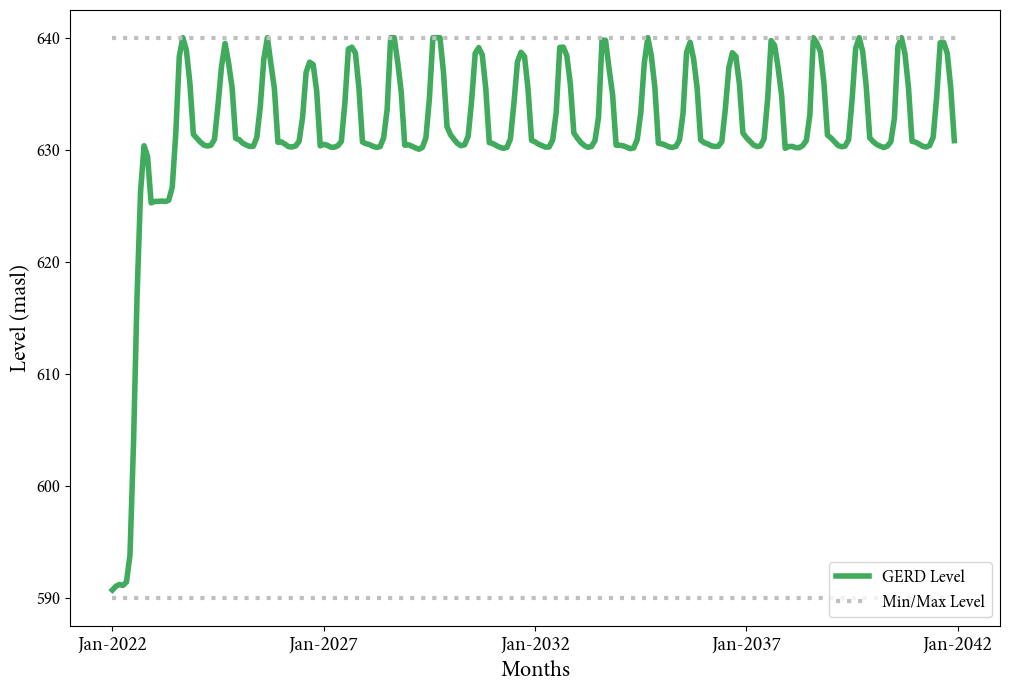

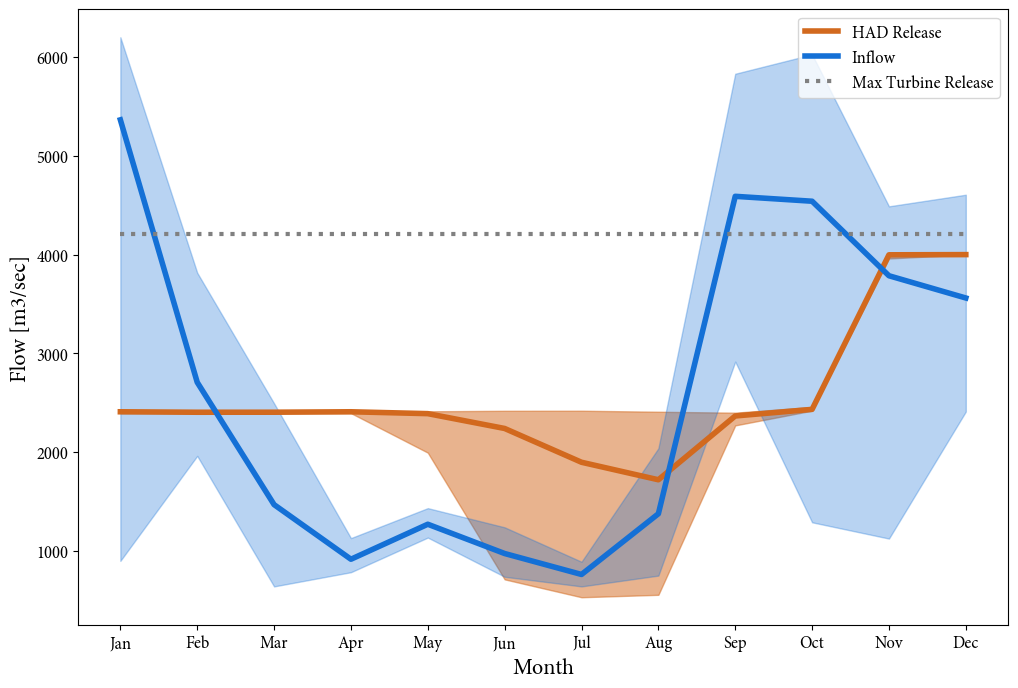

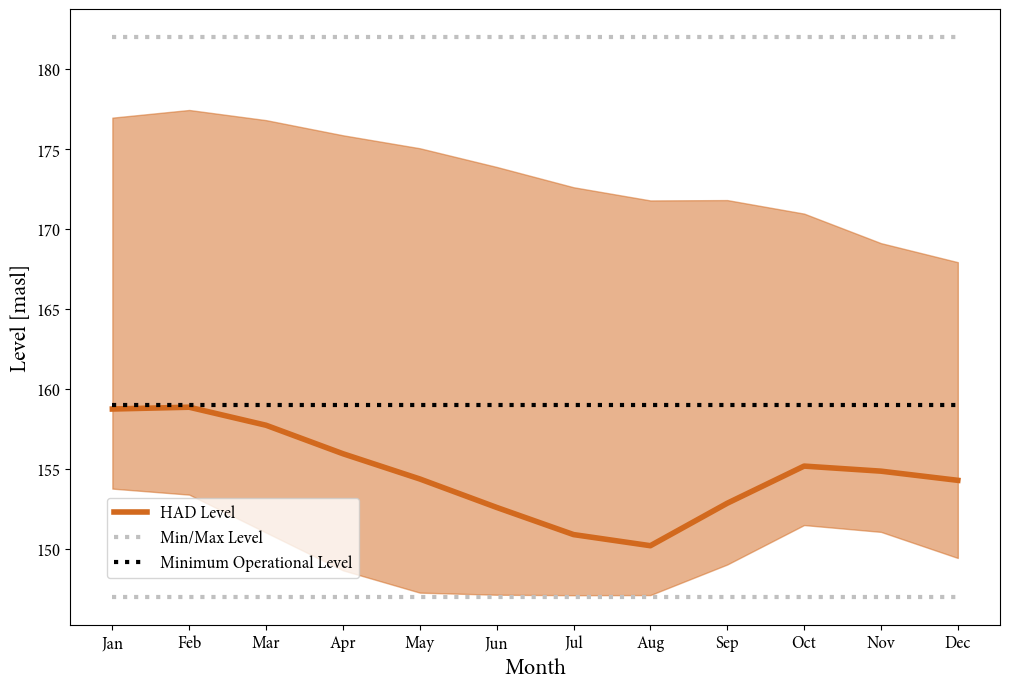

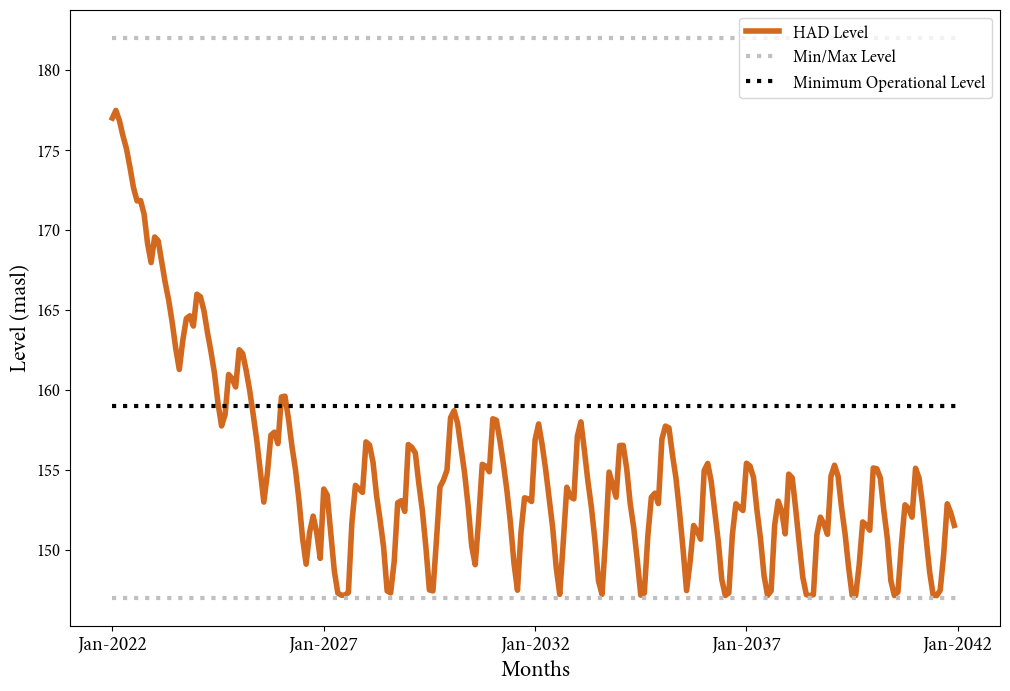

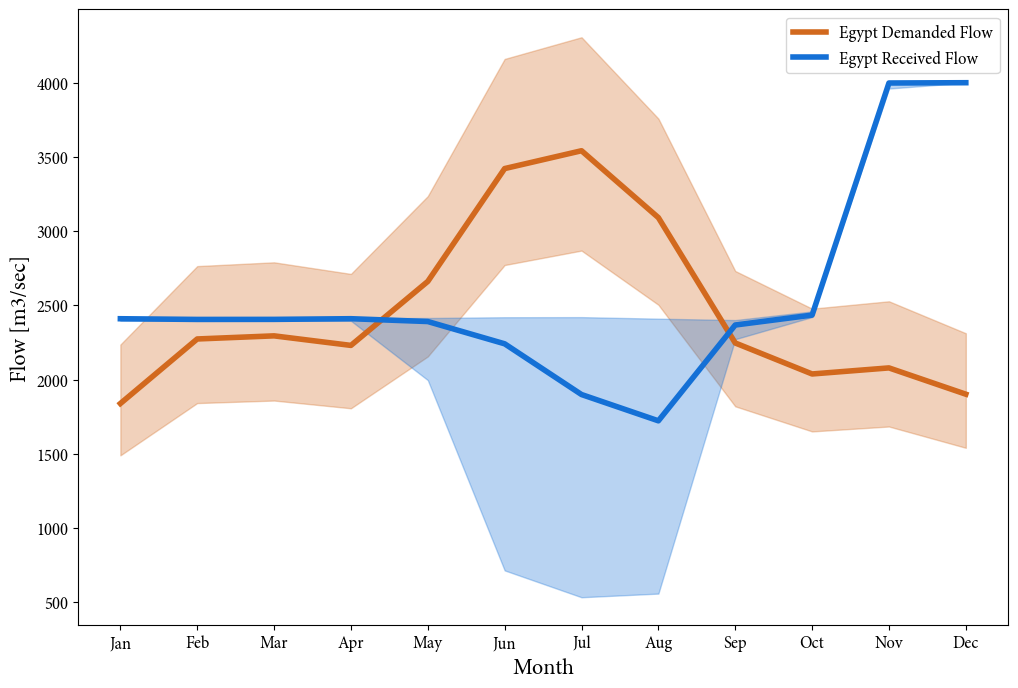

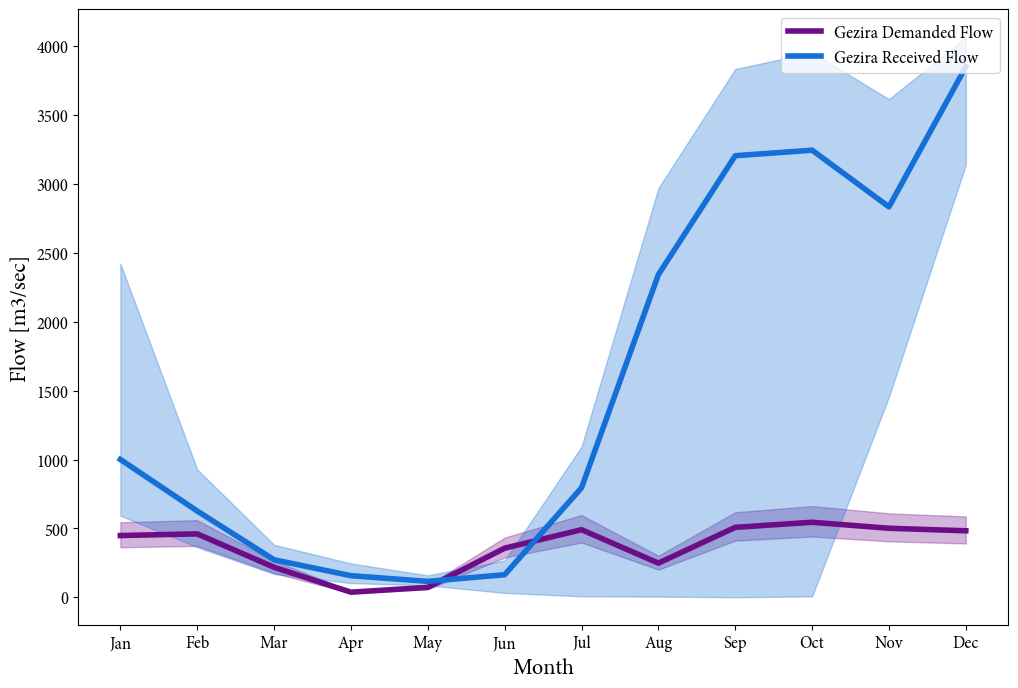

----------------
Compromise: Percentile Threshold
----------------


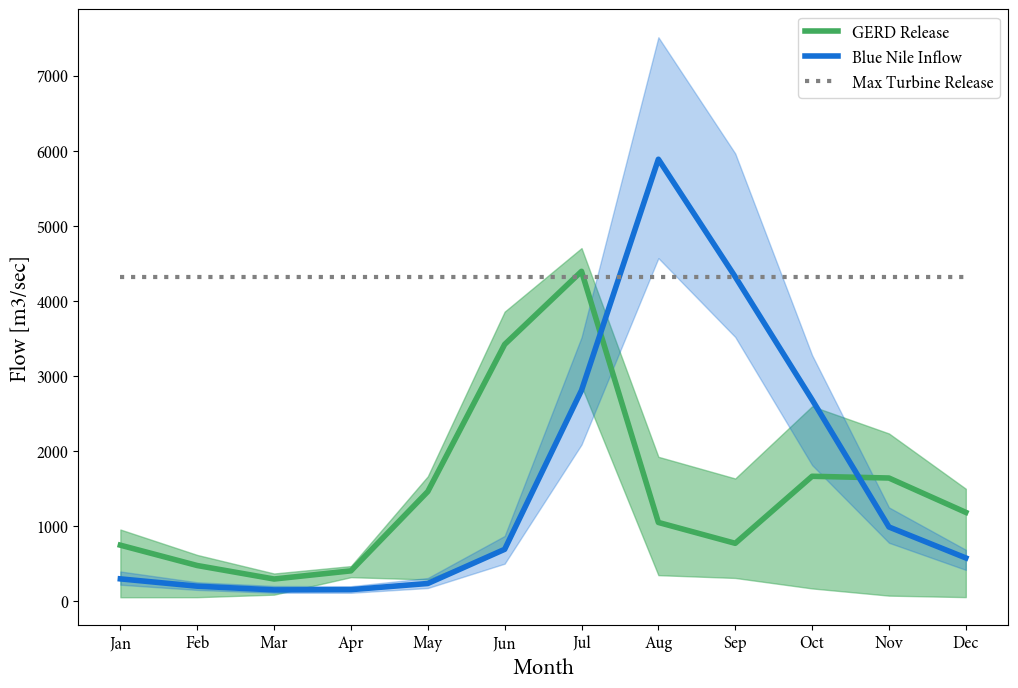

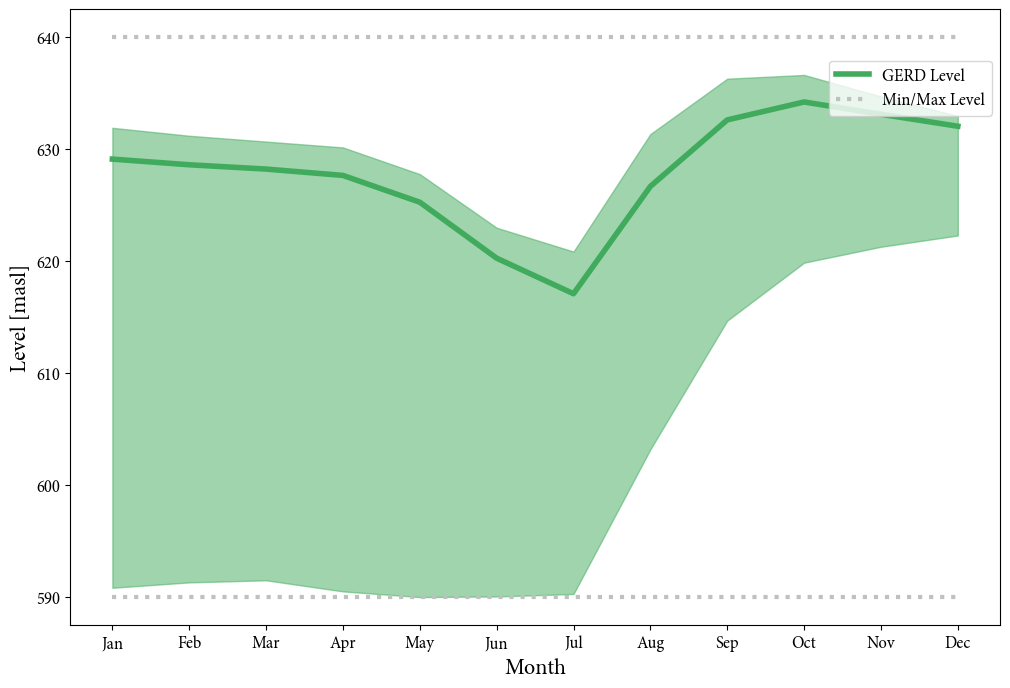

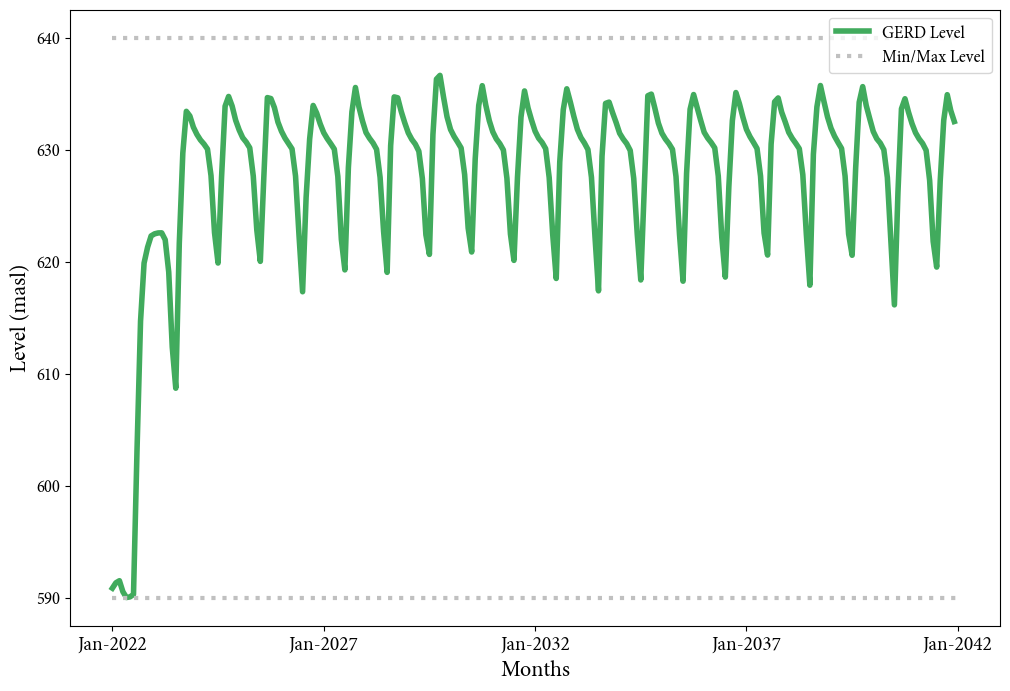

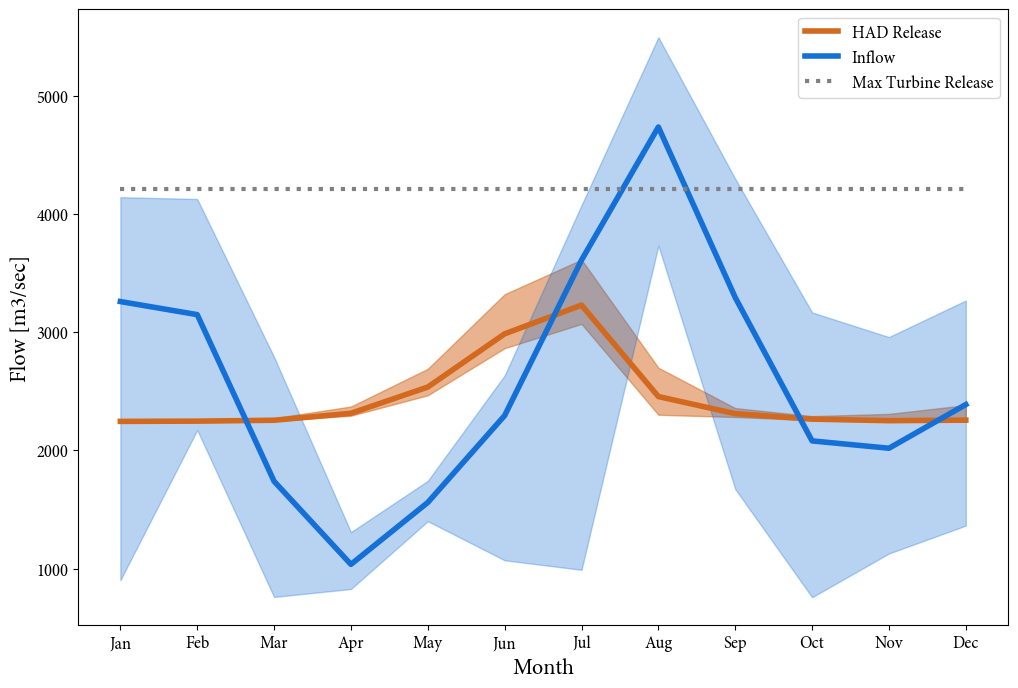

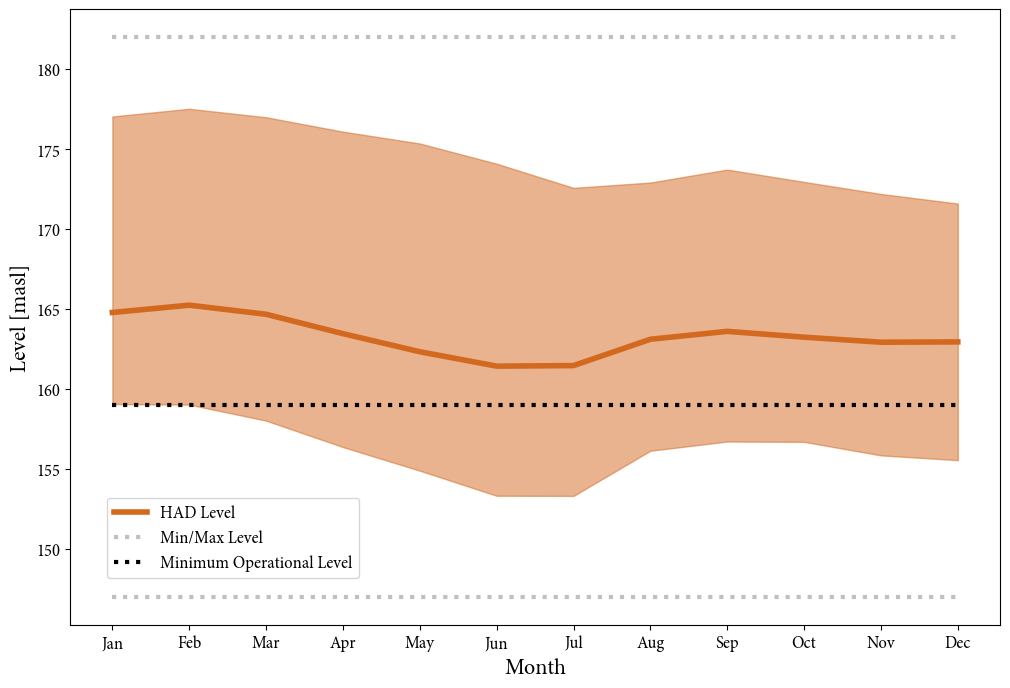

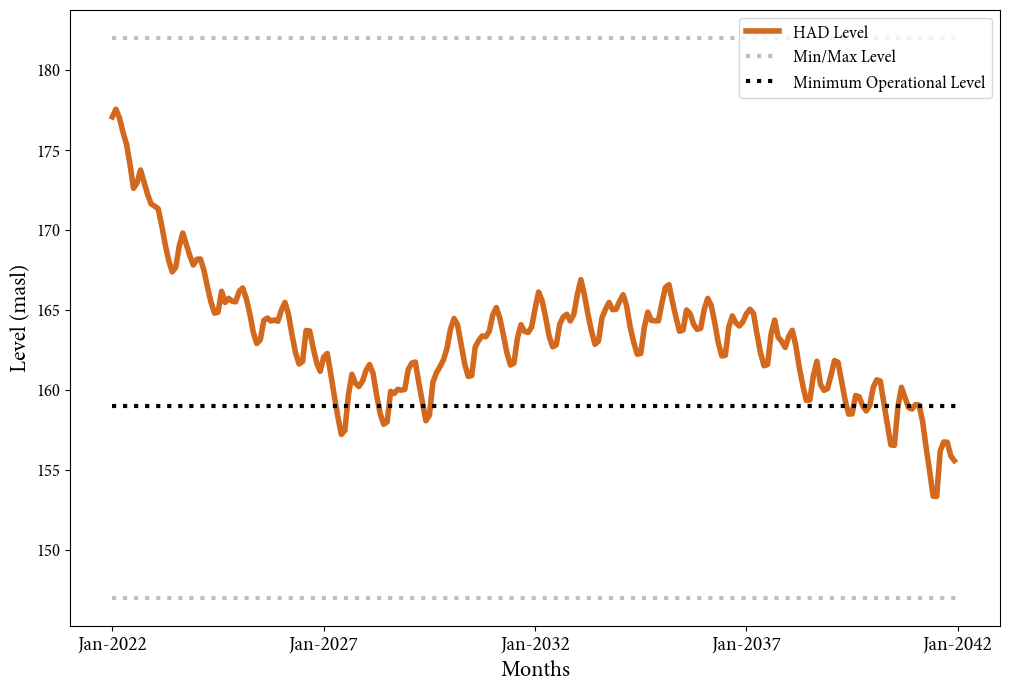

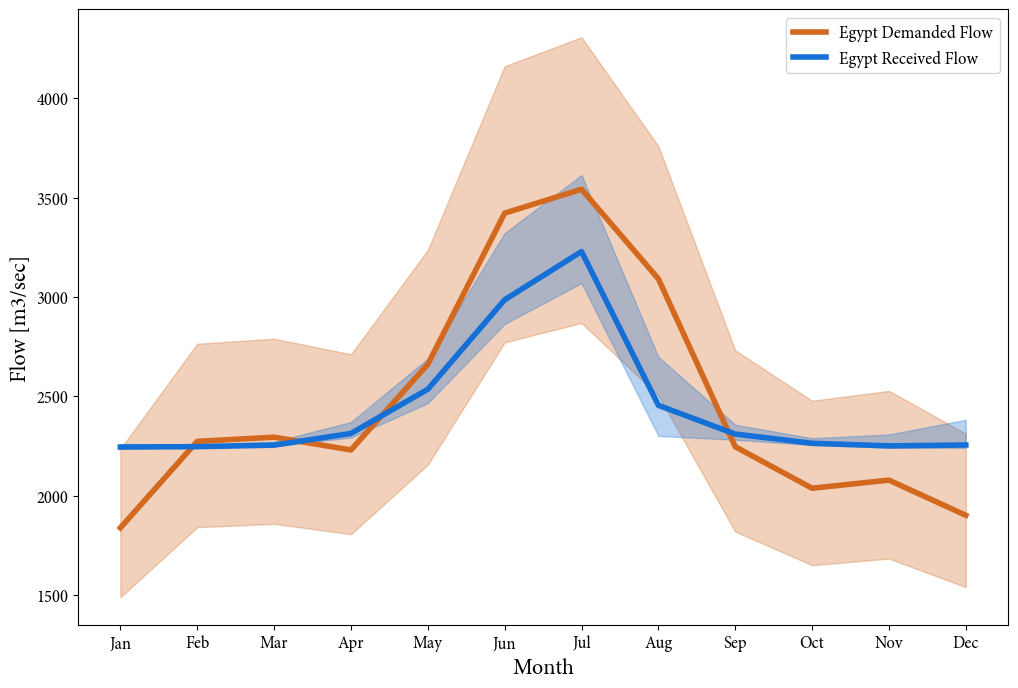

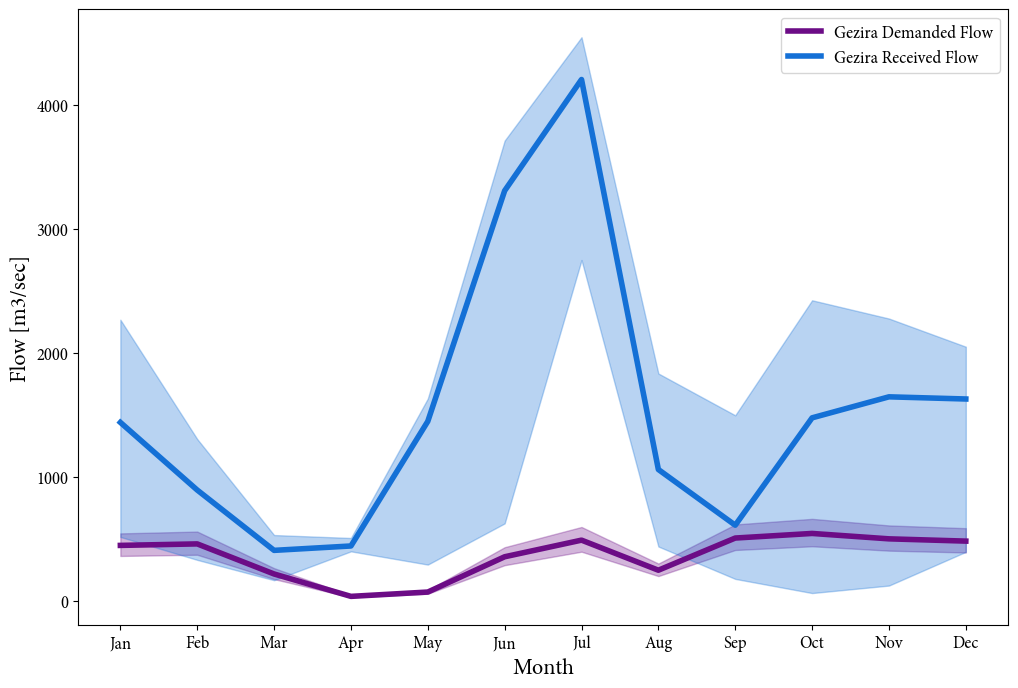

----------------
Compromise: Absolute Threshold
----------------


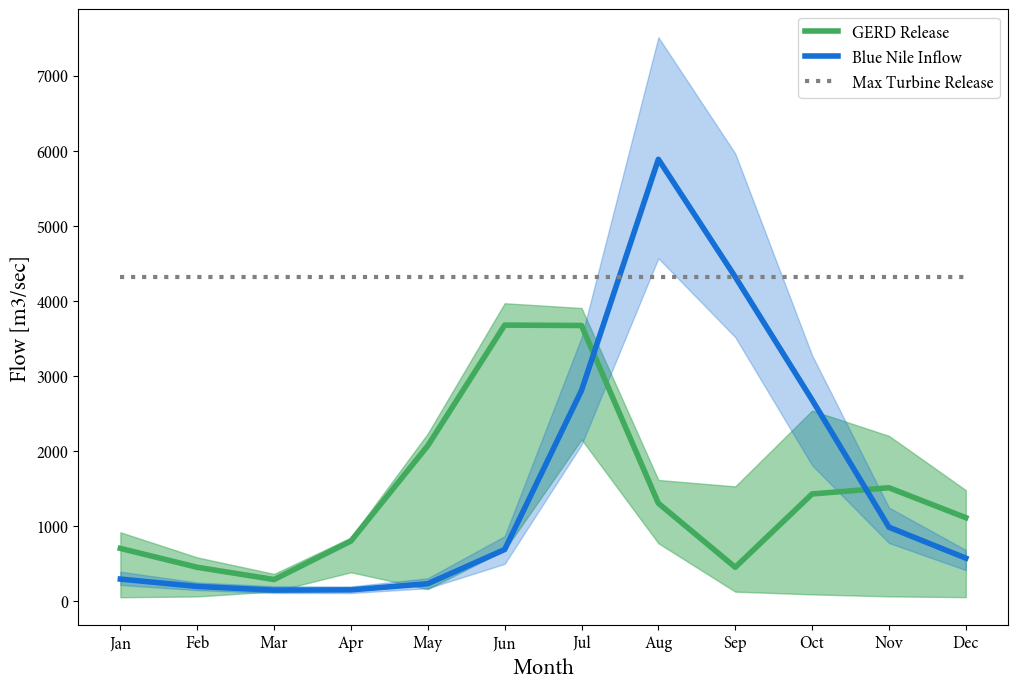

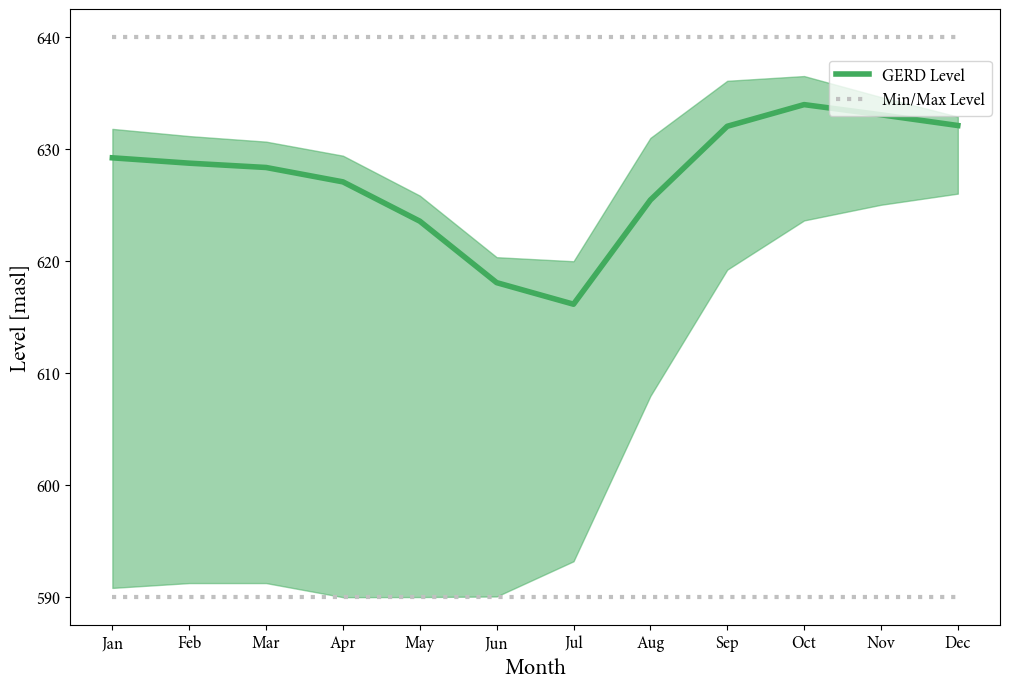

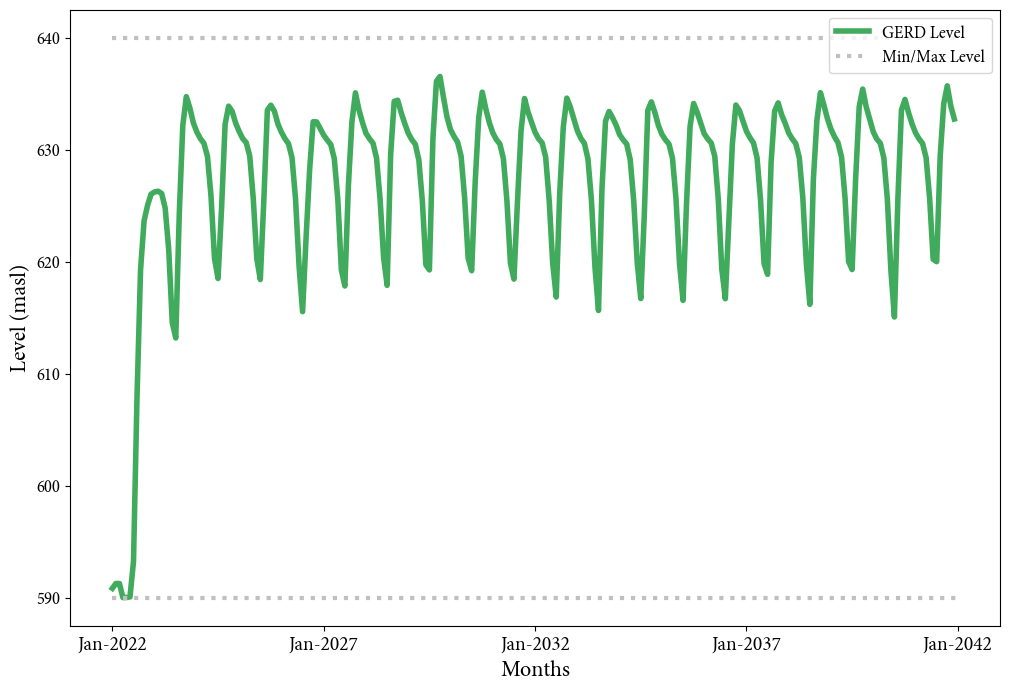

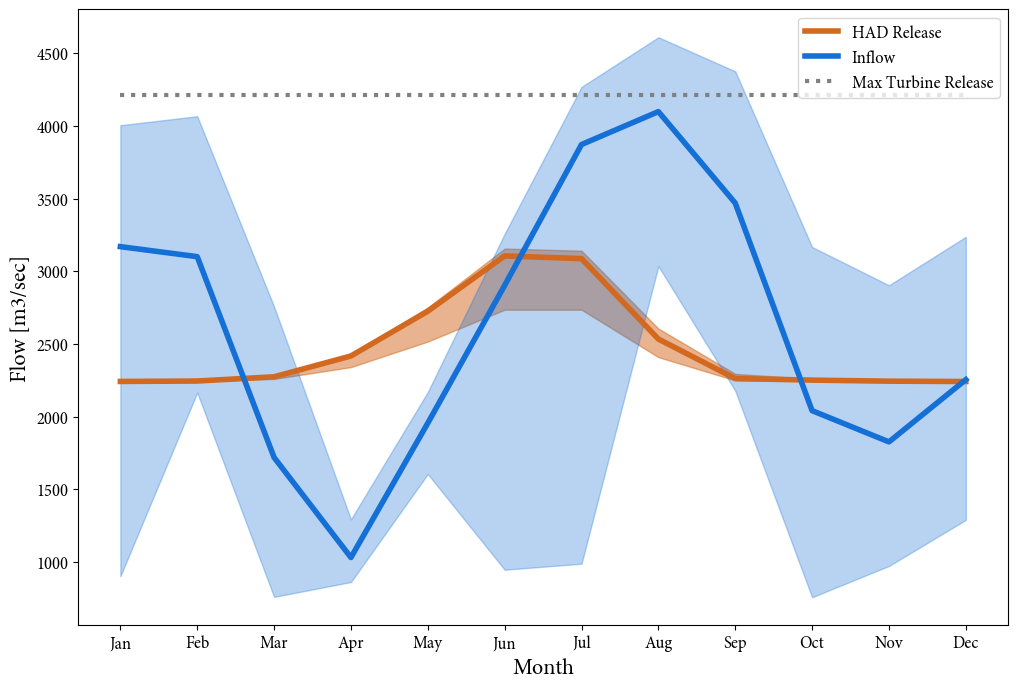

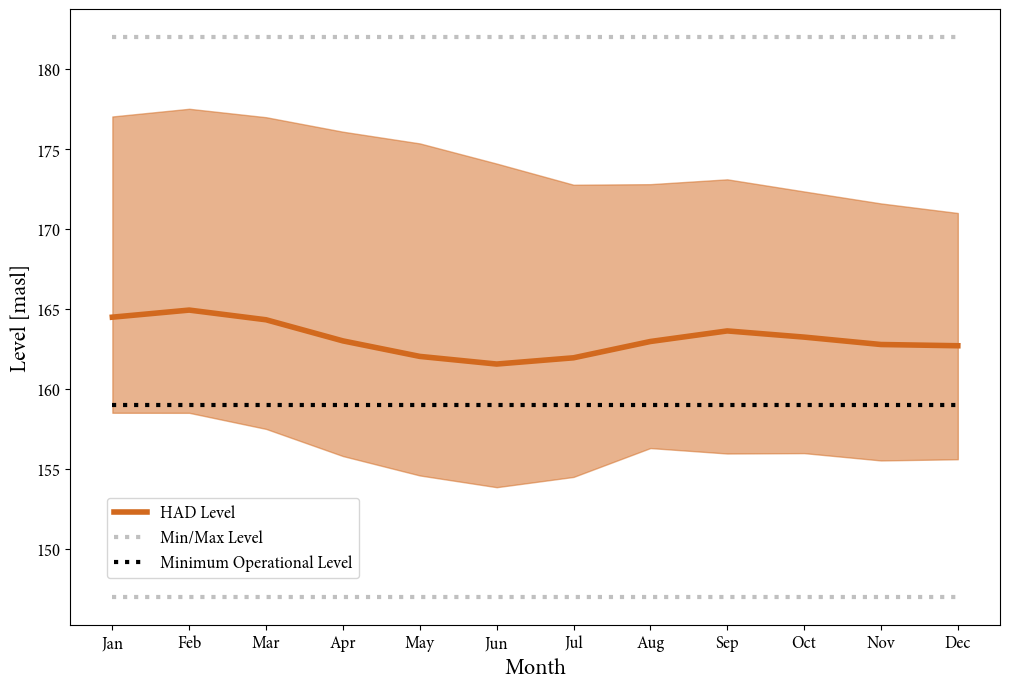

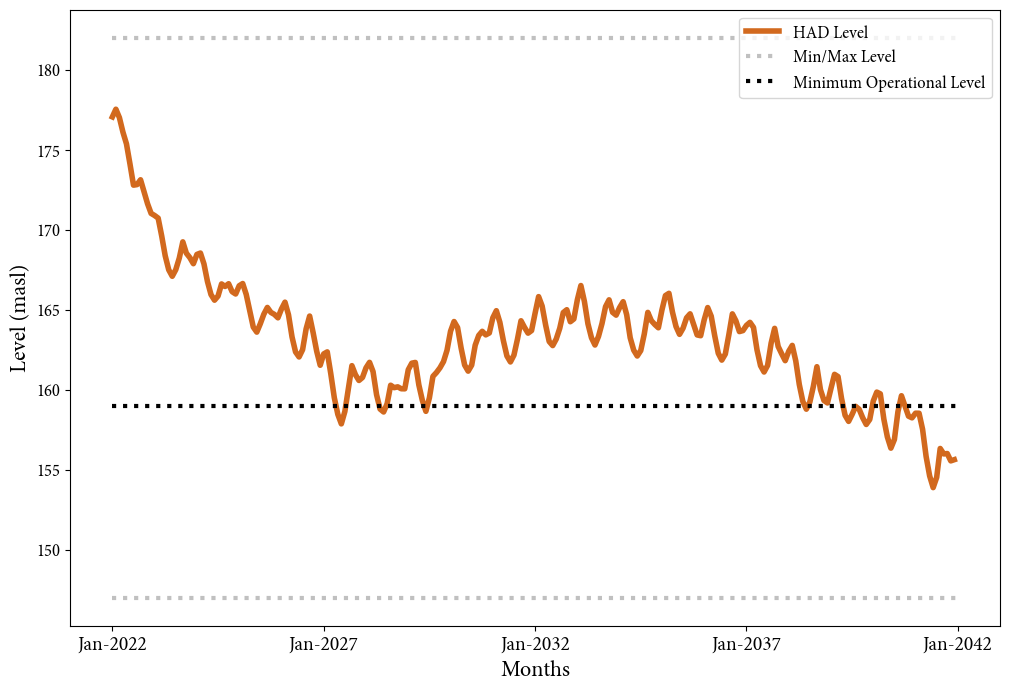

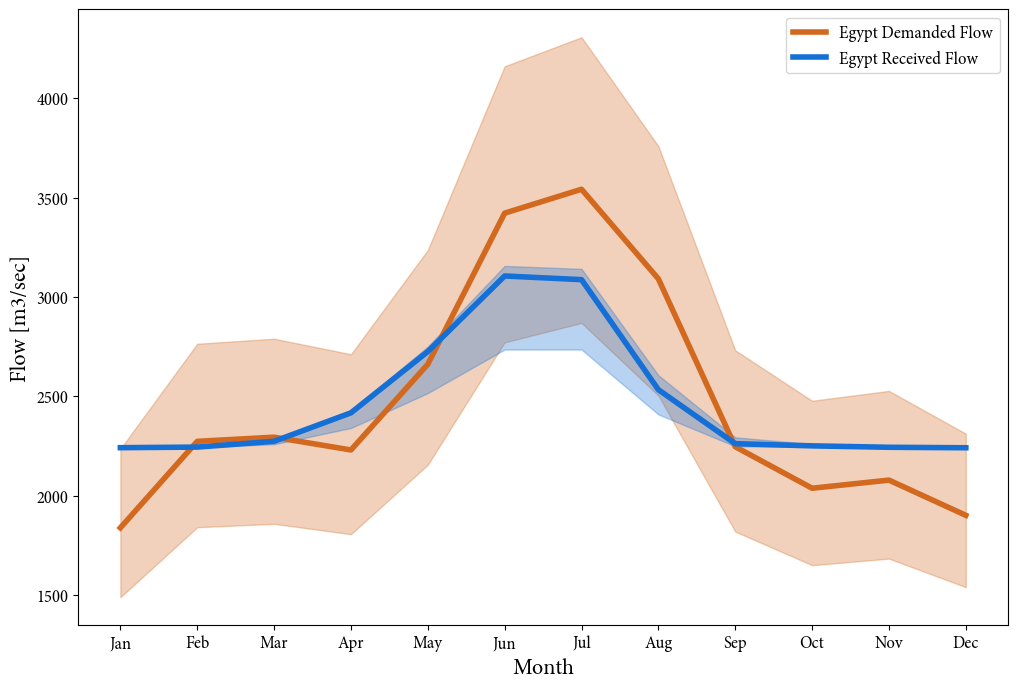

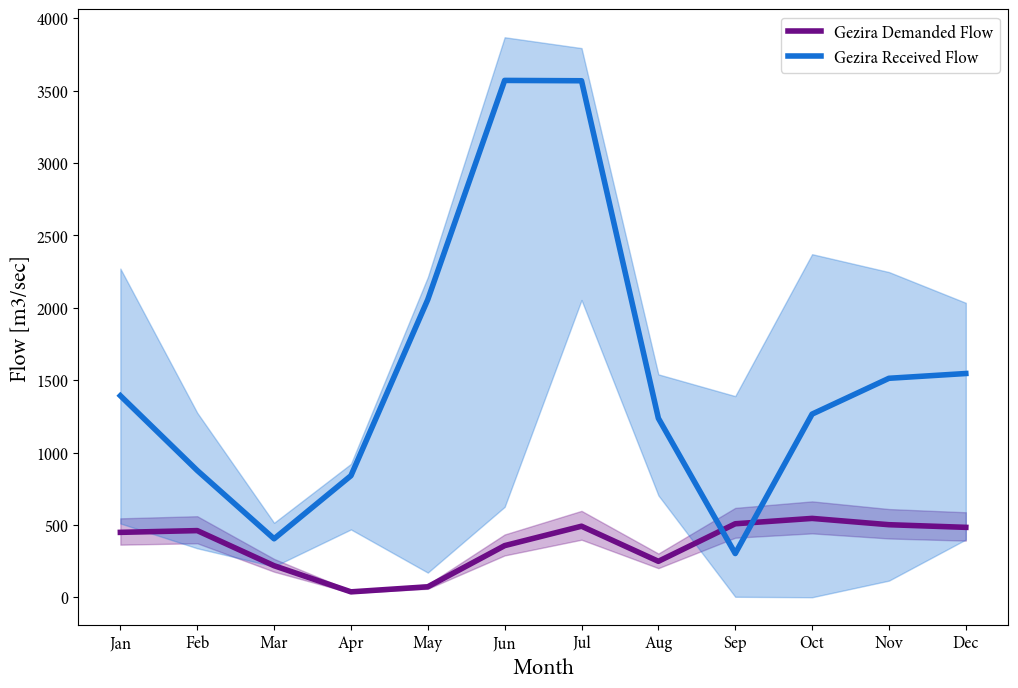

In [52]:
import importlib
importlib.reload(plotter)

for key, value in running_models.items():
    print("----------------")
    print(key)
    print("----------------")
    my_plotter = plotter.HydroModelPlotter(value)

    for dam in ["GERD", "HAD"]:
        my_plotter.plot_condensed_release_versus_inflow(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/release_vs_inflow_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_condensed_level(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/condensed_level_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_level_with_limits(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/level_with_limits_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

    for district in ["Egypt", "Gezira"]:
        my_plotter.plot_received_vs_demand_for_district_raw_condensed(district)
        plt.savefig(
            f"../plots/baseline_optimization/{district}/received_vs_demand_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()